In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import os

2014-10-28_20-13-33.csv
2014-10-29_19-23-31.csv
2015-04-13_19-48-38.csv
2015-04-13_20-11-51.csv
2015-04-14_19-06-55.csv
2015-04-15_18-23-43.csv
2015-04-15_18-46-11.csv
2015-04-20_18-12-42.csv
2015-04-20_18-34-50.csv
2015-04-21_17-22-56.csv
2015-05-25_12-54-23.csv
2015-05-25_13-17-44.csv
2015-05-26_17-11-46.csv
2015-05-26_17-37-45.csv
2015-05-27_13-30-57.csv
2015-05-27_13-55-57.csv
2015-05-29_14-57-26.csv
2015-05-29_15-30-56.csv
2015-05-30_15-32-19.csv
2015-05-31_15-27-37.csv
2015-05-31_15-57-01.csv
2016-02-17_09-22-44.csv
2016-02-17_11-05-34.csv
2016-06-26_18-51-06.csv
2016-06-26_18-51-18.csv
2016-06-26_19-13-17.csv
2016-06-26_19-13-20.csv
2016-06-26_19-32-06.csv
2016-06-26_19-32-08.csv


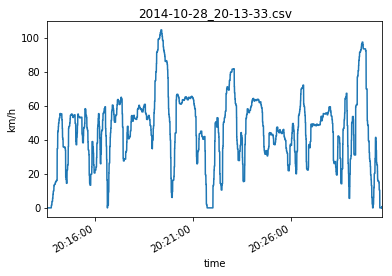

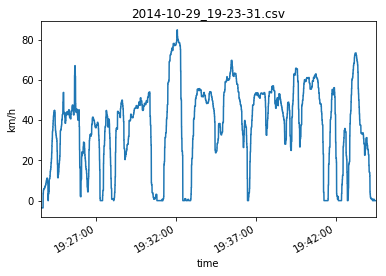

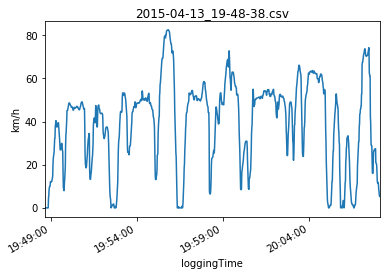

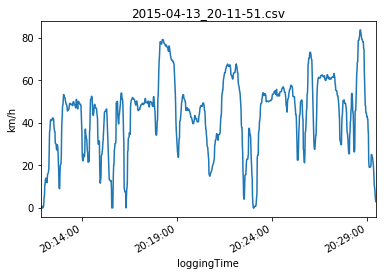

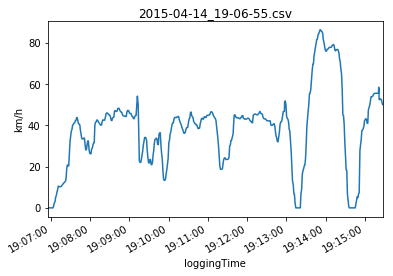

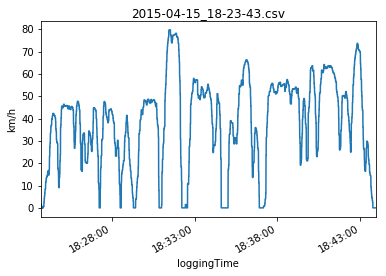

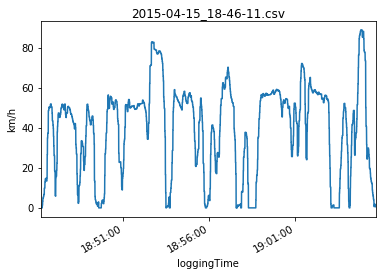

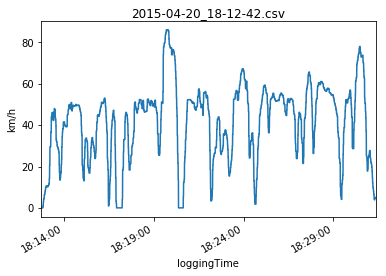

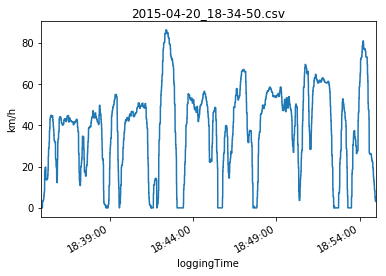

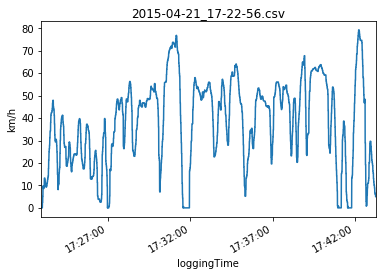

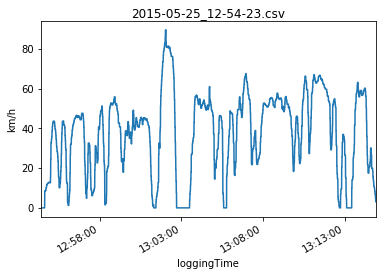

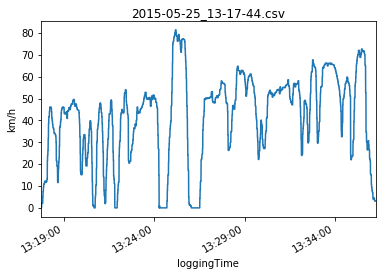

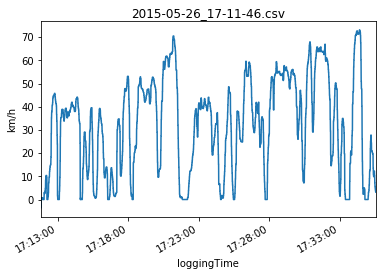

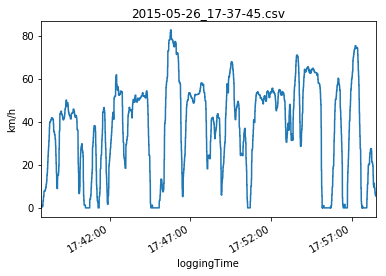

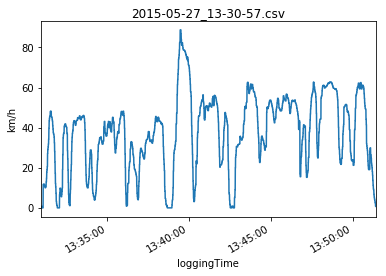

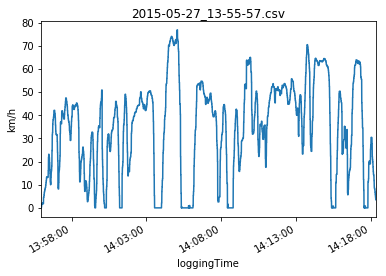

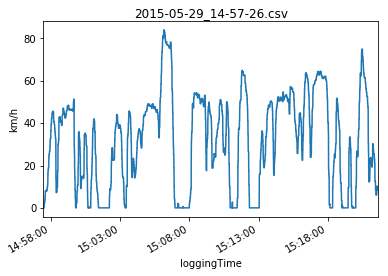

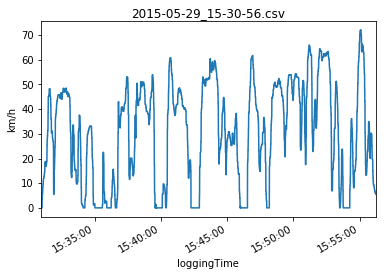

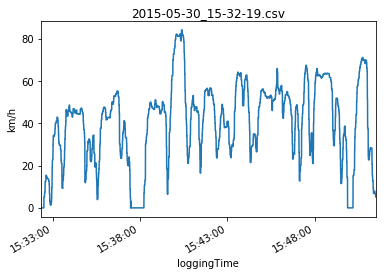

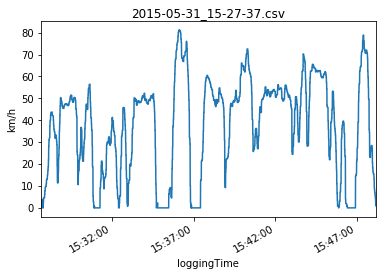

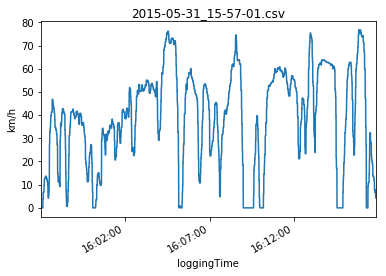

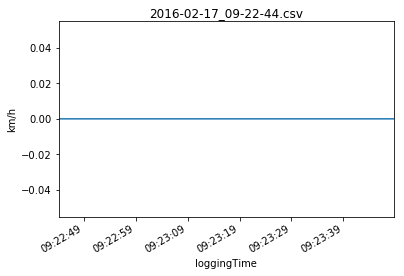

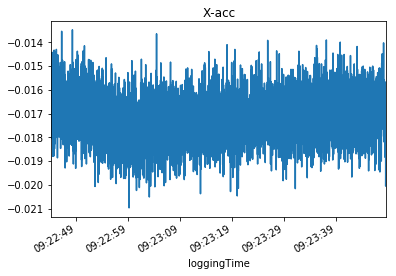

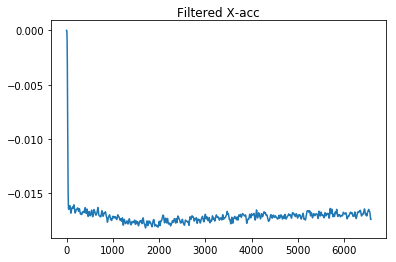

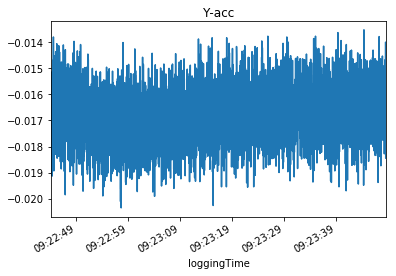

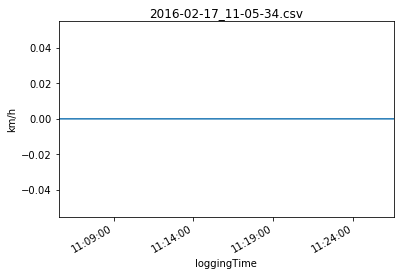

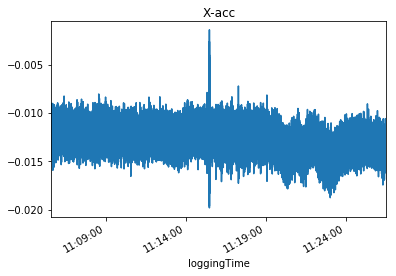

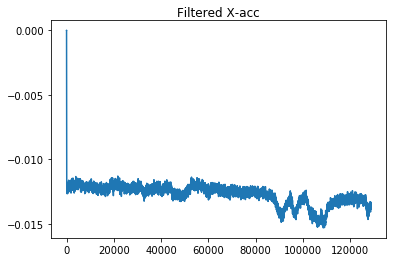

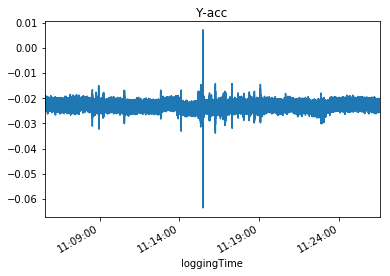

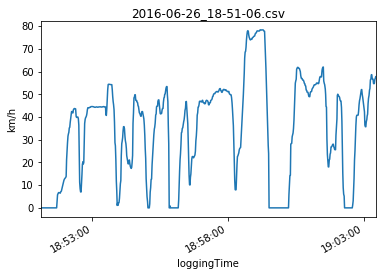

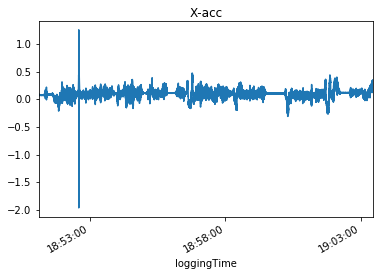

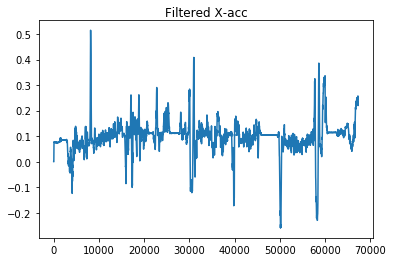

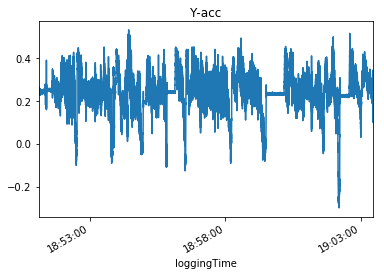

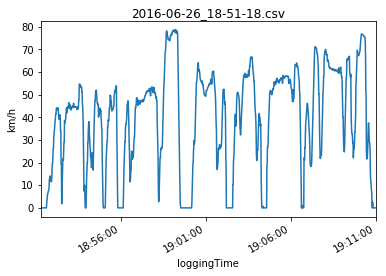

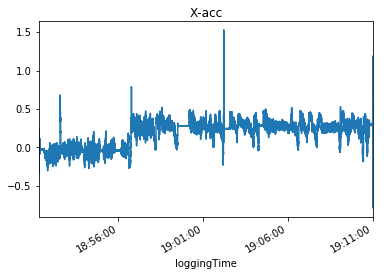

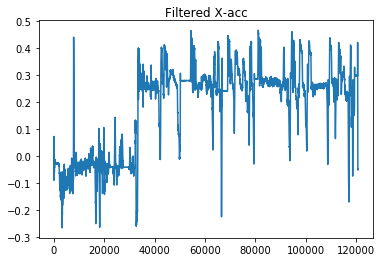

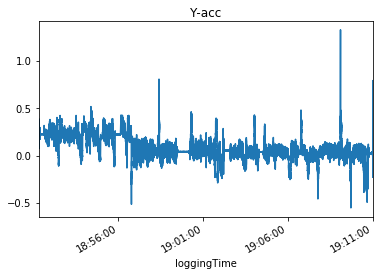

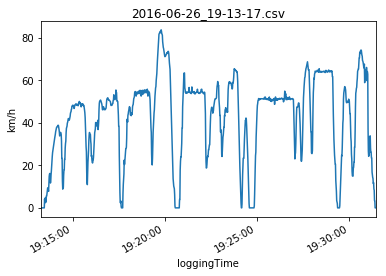

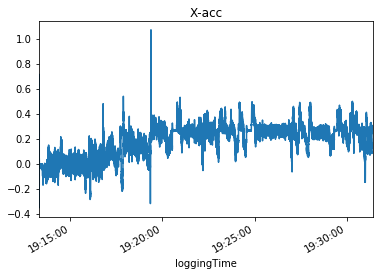

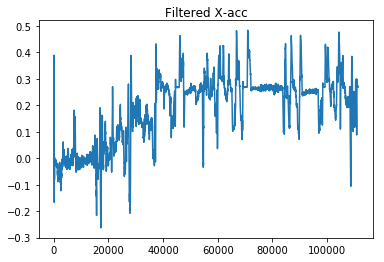

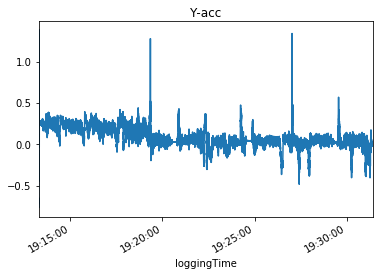

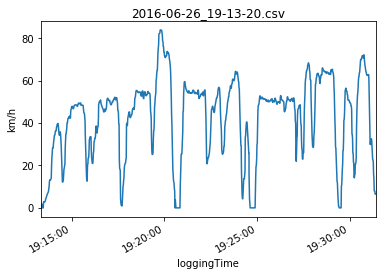

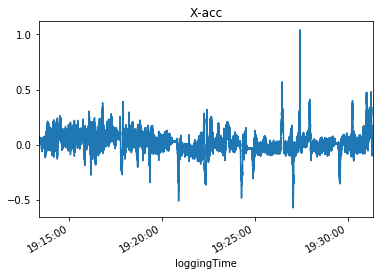

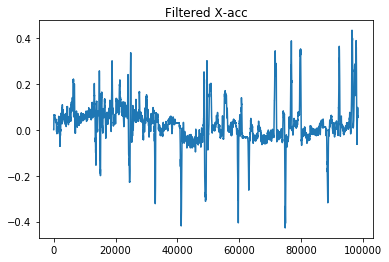

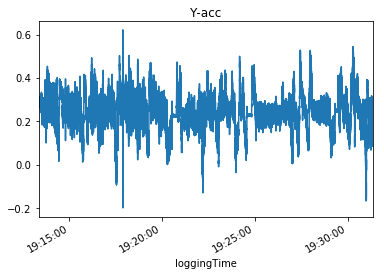

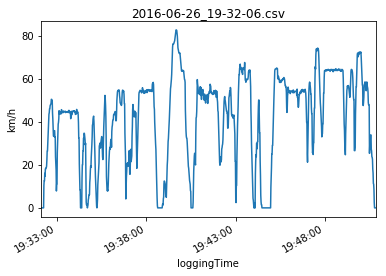

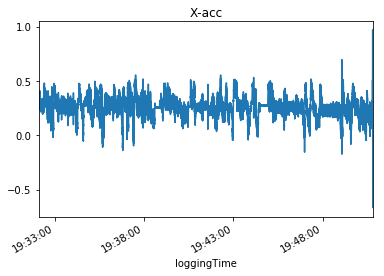

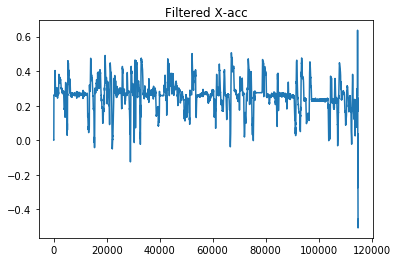

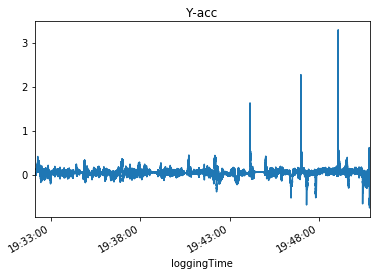

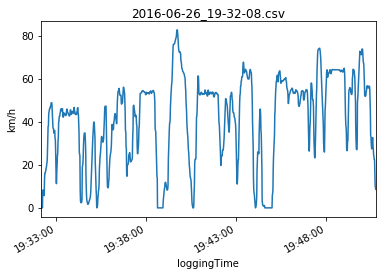

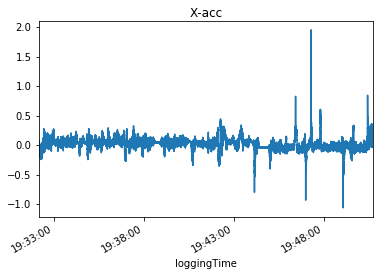

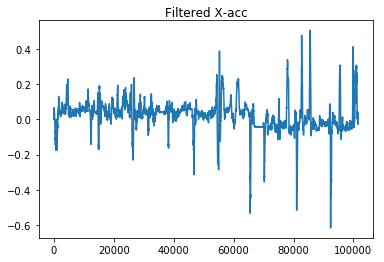

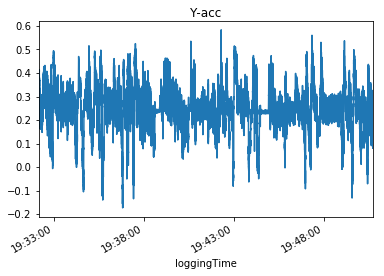

In [16]:
from collections import OrderedDict
from scipy.signal import firwin,lfilter
fir_win = firwin(50,2,nyq=45.)
        
    
data_points = 0    
datafile = '/Users/alehmann/Documents/Documents/HIH/phd_application/Eksperiment/'
trips = OrderedDict()
for d in os.listdir(datafile):
    if not d.endswith('csv'):
        continue
    if d in ['2015-04-13_19-48-38.csv',
             '2015-04-13_20-11-51.csv',
             '2015-04-14_19-06-55.csv']:
        pass
    print d
    trip = pandas.DataFrame.from_csv(datafile+d)
    data_points += len(trip)
    title(d)
    
    if 'locationSpeed' in trip.columns:
        trip['speed'] = trip['locationSpeed']
        trip['lat'] = trip['locationLatitude']
        trip['long'] = trip['locationLongitude']
    #print trip.columns    
    trips[d] = trip
    
    s = (trip['speed']*3.6)
    speed = s[~s.isnull()]
    ylabel('km/h')
    speed.plot()
    #(trip['motionYaw']*30).plot()
    savefig("speed_{}.png".format(d))
    figure()
    if 0:
        title('Accelleration')
        a=sqrt(trip['motionUserAccelerationX']**2+trip['motionUserAccelerationY']**2+trip['motionUserAccelerationZ']**2)
        b = a[~a.isnull()]
        if b.any() : 
            b.plot(ylim=(0,0.7))
            savefig("accel_{}.png".format(d))
            figure()
    if '2016' in d:
        
        title('X-acc')
        keyname = 'motionUserAcceleration'
        if 'accelerometerAccelerationX' in trip.keys():
            keyname = 'accelerometerAcceleration'
        s = trip[keyname+'X']
        s = s[~s.isnull()]
        if s.any(): s.plot()
        figure()
        title('Filtered X-acc')
        s = trip[keyname+'X']
        s = s[~s.isnull()]
        b_low = lfilter(fir_win,1,s)
        if b_low.any() : 
            plot(b_low)
            figure()

        title('Y-acc')
        s = trip[keyname+'Y']
        s = s[~s.isnull()]
        if s.any(): s.plot()
        #trip['motionUserAccelerationZ'].plot()
        figure()
       


2014-10-28_20-13-33.csv
2014-10-29_19-23-31.csv
2015-04-13_19-48-38.csv
2015-04-13_20-11-51.csv
2015-04-14_19-06-55.csv
2015-04-15_18-23-43.csv
2015-04-15_18-46-11.csv
2015-04-20_18-12-42.csv
2015-04-20_18-34-50.csv
2015-04-21_17-22-56.csv
2015-05-25_12-54-23.csv
2015-05-25_13-17-44.csv
2015-05-26_17-11-46.csv
2015-05-26_17-37-45.csv
2015-05-27_13-30-57.csv
2015-05-27_13-55-57.csv
2015-05-29_14-57-26.csv
2015-05-29_15-30-56.csv
2015-05-30_15-32-19.csv
2015-05-31_15-27-37.csv
2015-05-31_15-57-01.csv
2016-02-17_09-22-44.csv
2016-02-17_11-05-34.csv
2016-06-26_18-51-06.csv
2016-06-26_18-51-18.csv
2016-06-26_19-13-17.csv
2016-06-26_19-13-20.csv
2016-06-26_19-32-06.csv
2016-06-26_19-32-08.csv


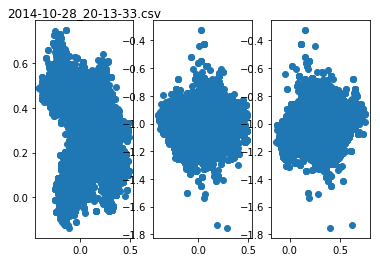

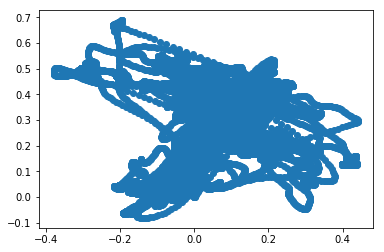

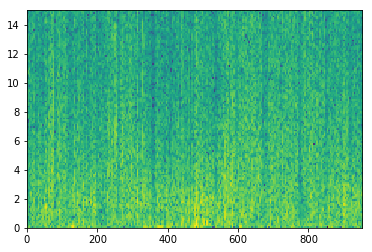

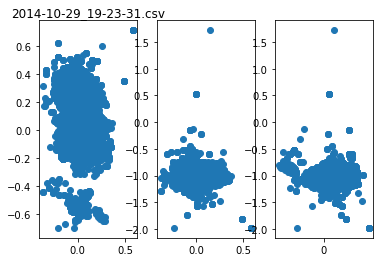

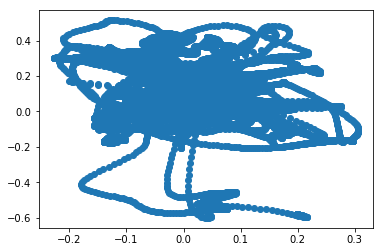

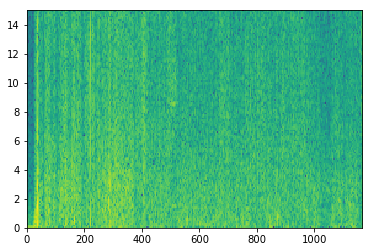

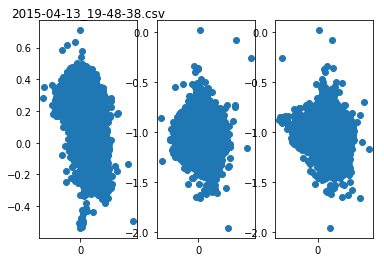

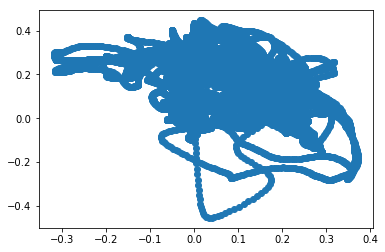

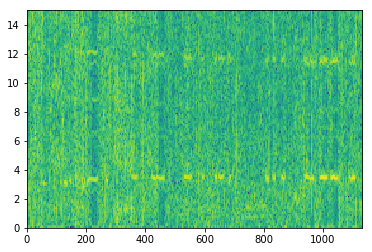

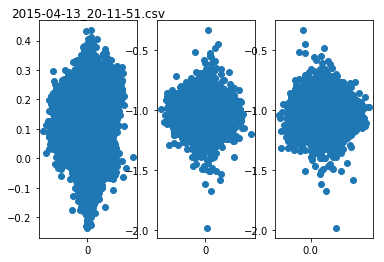

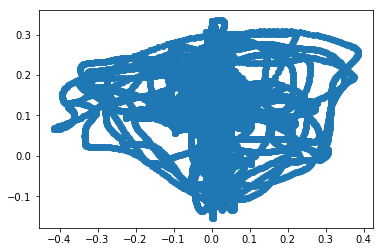

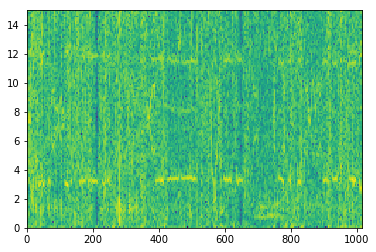

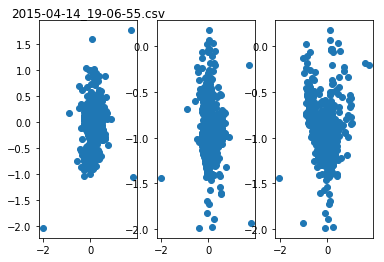

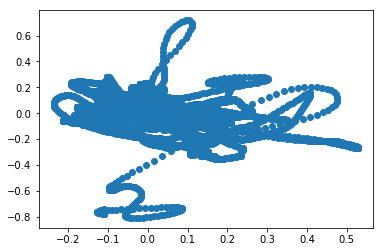

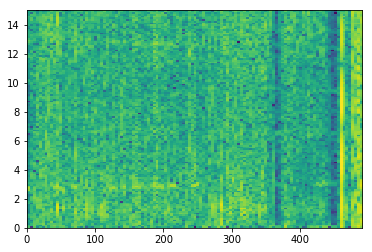

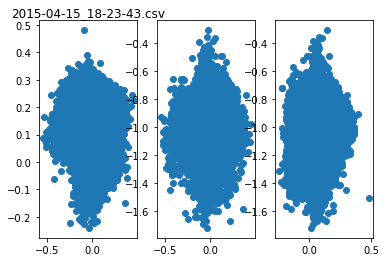

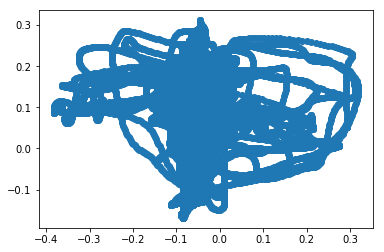

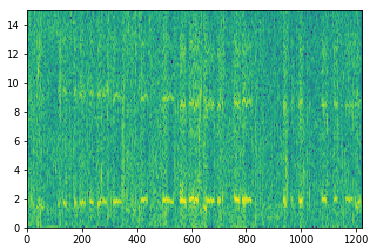

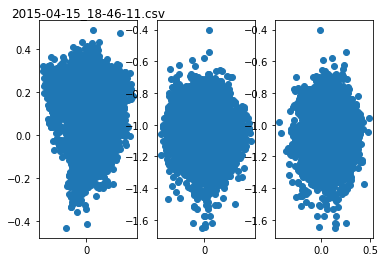

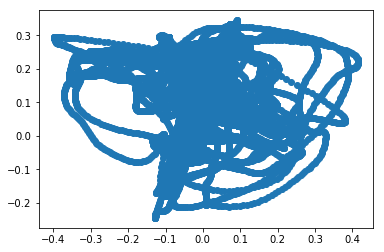

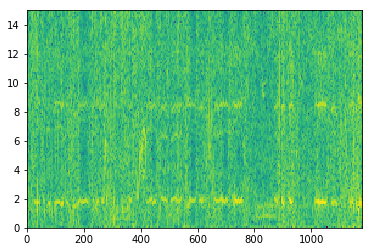

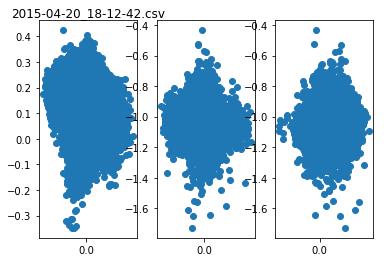

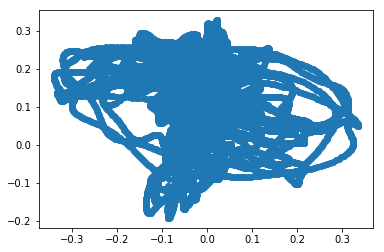

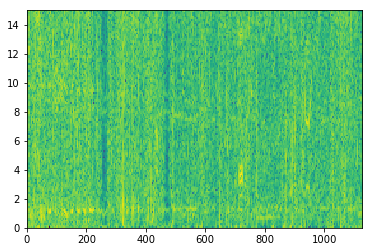

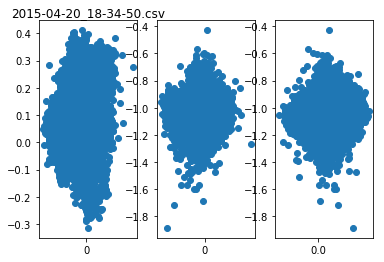

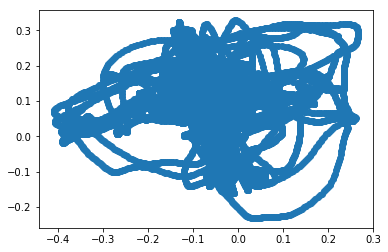

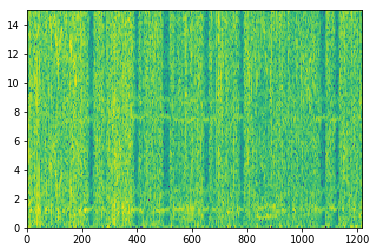

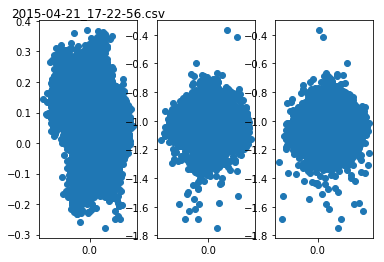

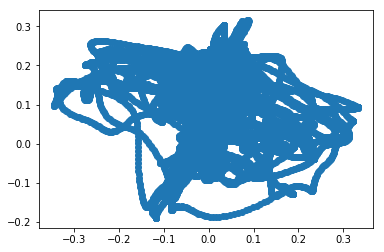

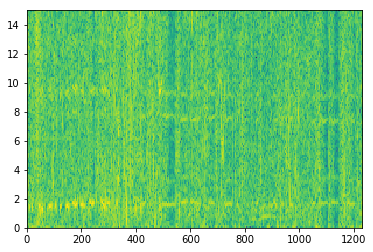

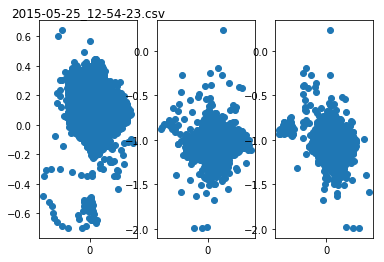

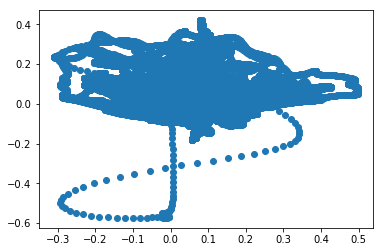

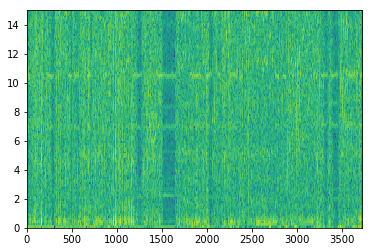

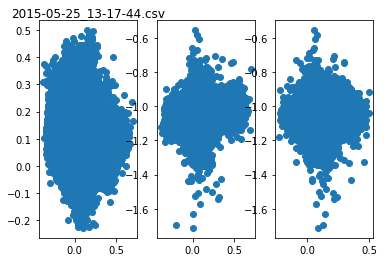

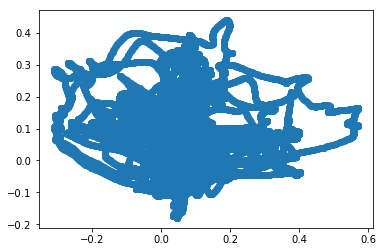

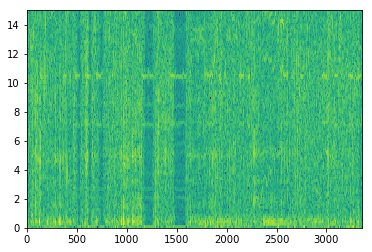

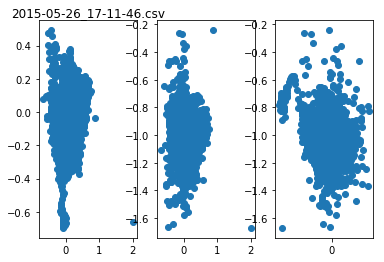

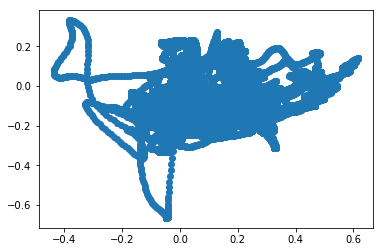

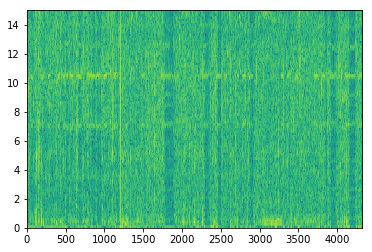

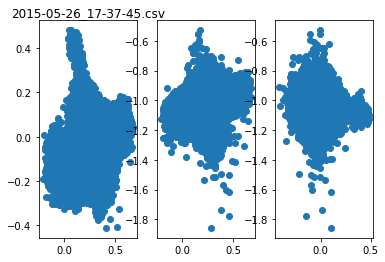

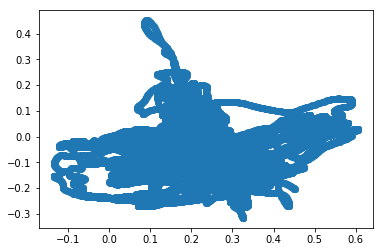

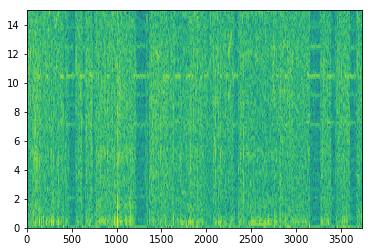

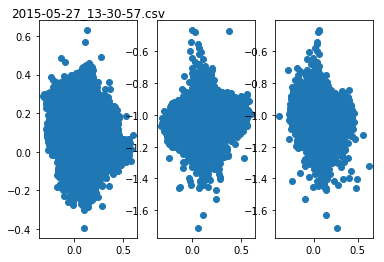

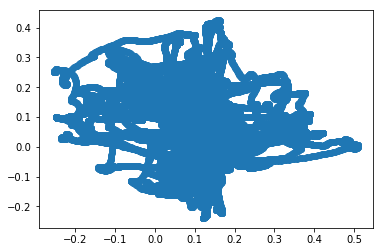

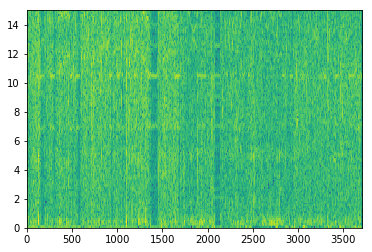

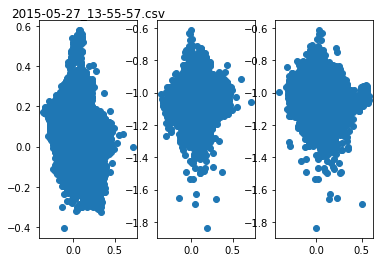

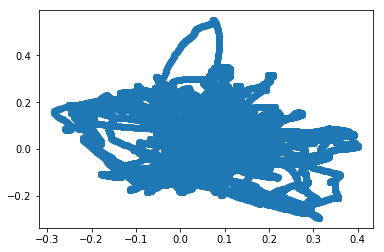

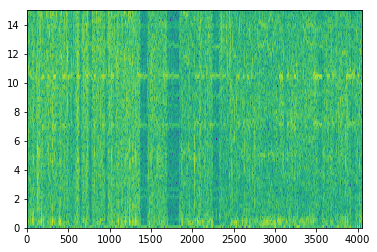

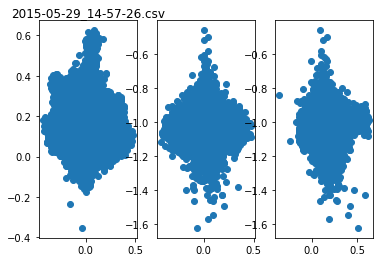

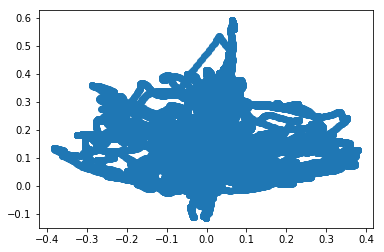

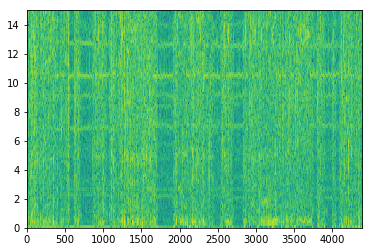

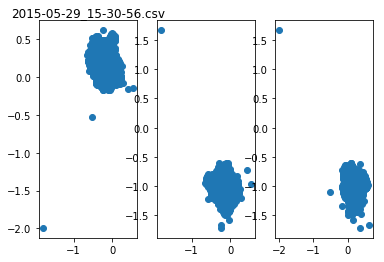

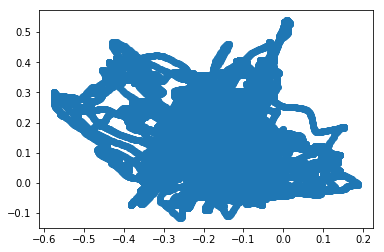

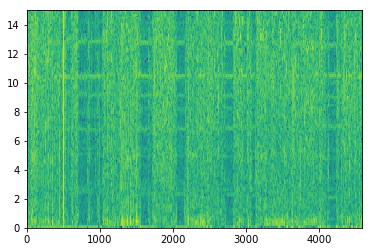

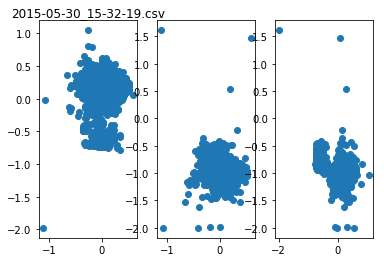

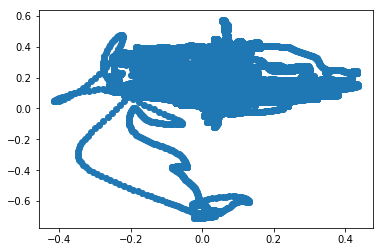

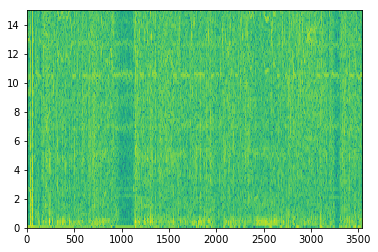

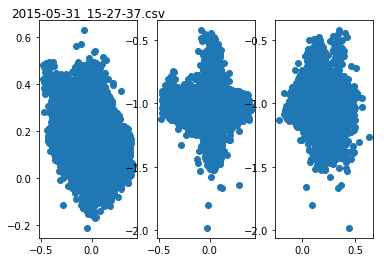

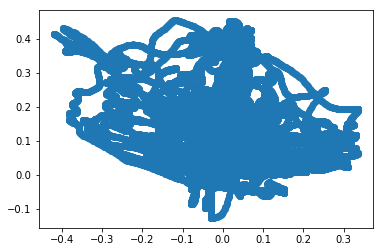

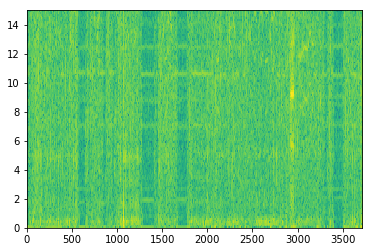

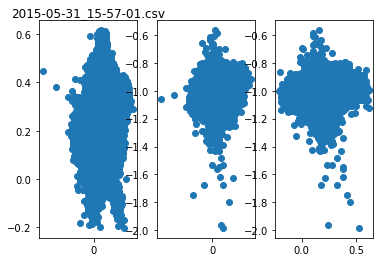

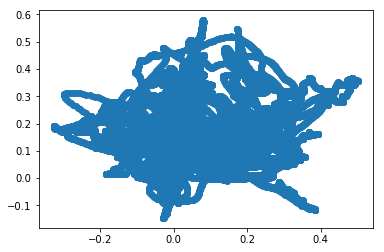

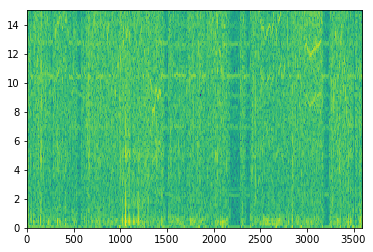

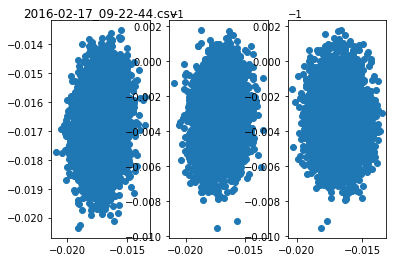

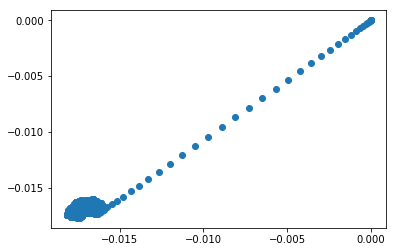

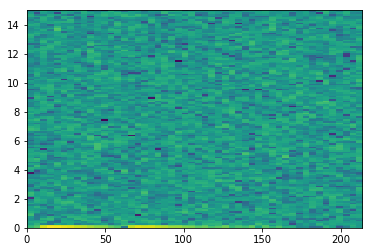

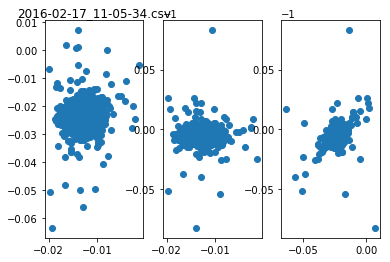

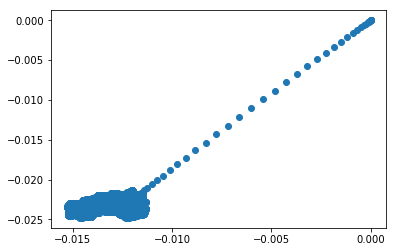

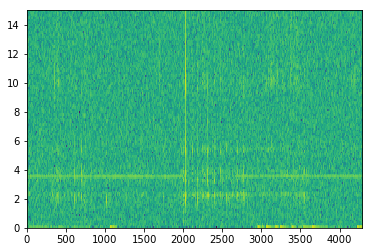

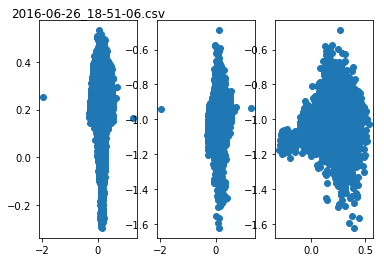

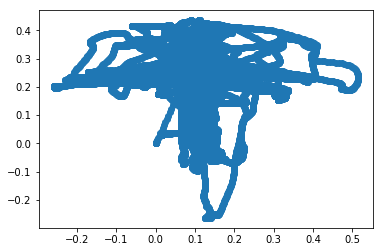

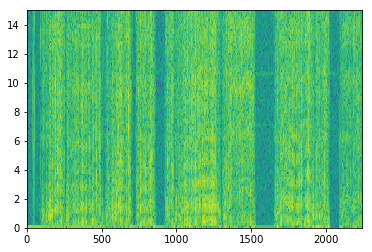

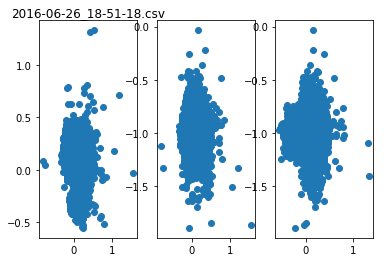

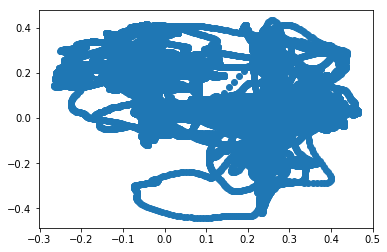

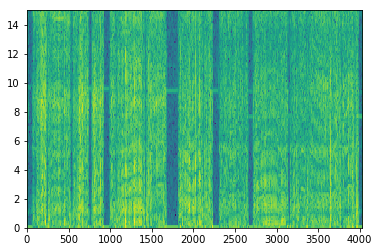

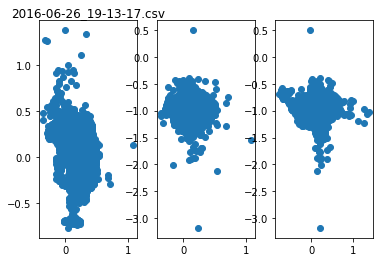

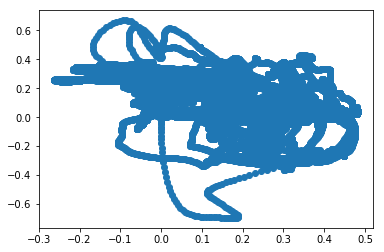

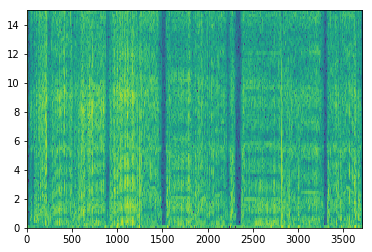

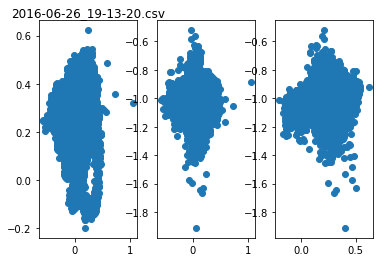

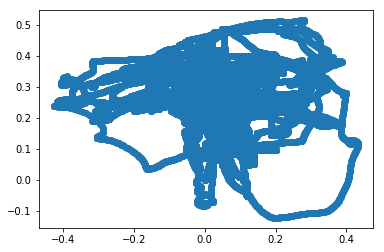

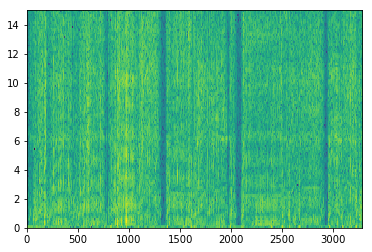

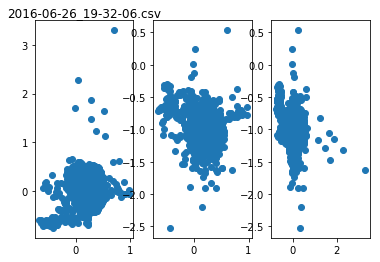

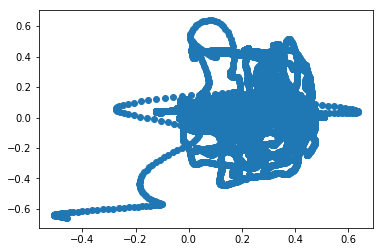

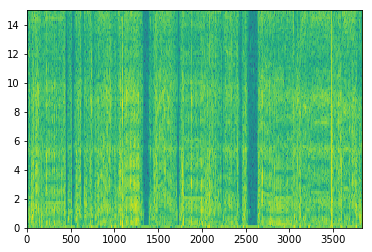

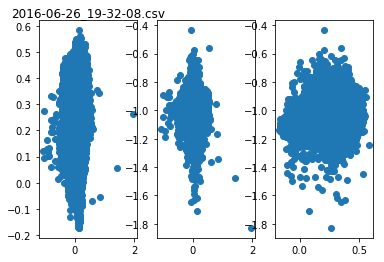

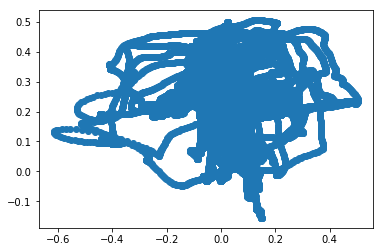

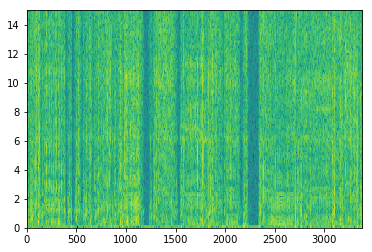

In [26]:
for d,trip in trips.items():
    print d
    if u'accelerationX' in trip.columns:
        acc = 'acceleration{}'
    else:
        acc = 'accelerometerAcceleration{}'
    x = trip[acc.format('X')]
    y = trip[acc.format('Y')]
    z = trip[acc.format('Z')]
    subplot(131)
    plot(x,y,'o')
    title(d)
    subplot(132)
    plot(x,z,'o')

    subplot(133)
    plot(y,z,'o')
    figure()
    x_low = lfilter(fir_win,[1],x)
    y_low = lfilter(fir_win,[1],y)
    plot(x_low,y_low,'o')
    figure()
    acc = x**2+y**2+z**2
    with open(d+'.dat','w') as f:
        f.write(acc.to_string())
    specgram(acc-acc.mean(),Fs=30)
    figure()

In [5]:
tid = (x.index[-1]-x.index[0])
tid.total_seconds()

1117.496

In [6]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username="redorlik", 
                             api_key="2rq92pnw79")

In [31]:
end = x.index[-1] #datetime.datetime.strptime('2015-05-31 15:57:01.574000','%Y-%m-%d %H:%M:%S.%f')
begin = x.index[0] #datetime.datetime.strptime('2015-05-31 16:16:50.208000','%Y-%m-%d %H:%M:%S.%f')
sampletime = (end-begin).total_seconds()/len(acc)
print len(acc)
print 1/sampletime,acc.mean()
import mpl_toolkits.mplot3d.axes3d as p3
print y.index
idx = 10000 #looked interesting
length = 3600
x1 = x_low[idx:idx+length] 
y1 = y_low[idx:idx+length]
trace1 = Scatter3d(x=x1,y=y1,z=range(length))
data = Data([trace1, ])
layout = Layout(
    margin=Margin(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='simple-3d-scatter')
print plot_url
#show()

101569
90.8898107913 1.11666756412
DatetimeIndex(['2016-06-26 19:32:08.145000', '2016-06-26 19:32:08.148000',
               '2016-06-26 19:32:08.150000', '2016-06-26 19:32:08.152000',
               '2016-06-26 19:32:08.153000', '2016-06-26 19:32:08.155000',
               '2016-06-26 19:32:08.156000', '2016-06-26 19:32:08.158000',
               '2016-06-26 19:32:08.160000', '2016-06-26 19:32:08.162000', 
               ...
               '2016-06-26 19:50:45.491000', '2016-06-26 19:50:45.503000',
               '2016-06-26 19:50:45.515000', '2016-06-26 19:50:45.546000',
               '2016-06-26 19:50:45.615000', '2016-06-26 19:50:45.617000',
               '2016-06-26 19:50:45.619000', '2016-06-26 19:50:45.622000',
               '2016-06-26 19:50:45.627000', '2016-06-26 19:50:45.641000'],
              dtype='datetime64[ns]', name=u'loggingTime', length=101569, freq=None, tz=None)
https://plot.ly/~redorlik/14


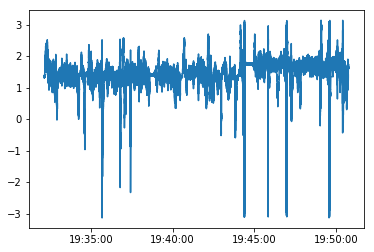

In [32]:
vector_len = np.sqrt(np.square(x)+np.square(y))
vector_angle = np.arctan2(y,x)
plot(vector_angle)

In [33]:
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
mpl_toolkits

<module 'mpl_toolkits' from '/Library/Python/2.7/site-packages/matplotlib-override/mpl_toolkits/__init__.pyc'>

In [34]:
import geopandas as gpd
from geopandas.base import *
import geojsonio
import geopandas.io.osm as osm
from shapely.geometry import Point,LineString

ImportError: No module named osm

In [ ]:
t = [x[['long','lat']].get_values() for x in trips]

u = [LineString(x) for x in t]
u
BaseMap

In [ ]:

df = gpd.GeoDataFrame(geometry=u)
df.plot()
y = df['geometry' ]
#y.to_


In [ ]:
bbox = df['geometry'].total_bounds#(8.625,56.37,8.625957,56.37259)#df['geometry'].total_bounds
ways = osm.query_osm('way',recurse='down', bbox=bbox, tags='')
ways['geometry']

In [ ]:
print bbox

ways[::10].plot()
#df[::10].plot()

In [ ]:


df_lights = osm.query_osm('node', bbox=df['geometry'].total_bounds, tags='highway=traffic_signals')
df_lights['marker-color'] = '#4daf4a'
combined = df.append(df_lights)#.set_geometry('geometry')
#df_lights.plot()
#combined.plot()


g/km 51.6270566728, l/km 0.0683802075136
g/km 46.4384678077, l/km 0.0545692923709


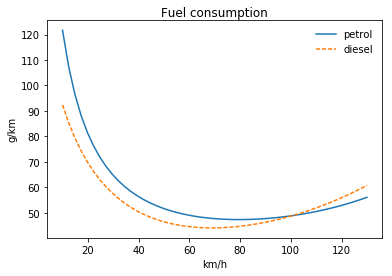

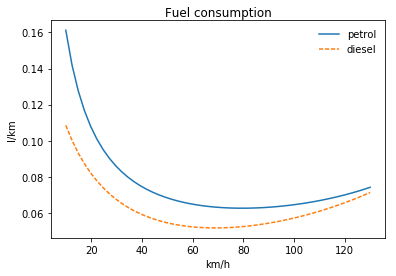

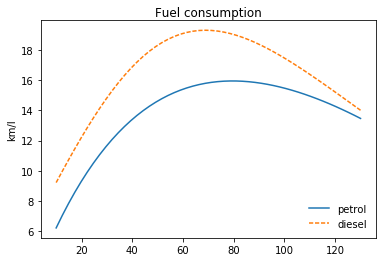

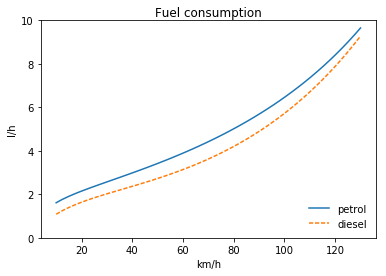

In [5]:
def CopertIV_gas(v,a=347,b=0.217,c=2.73,d=-9.11e-4,e=4.28e-3): #Euro2 1.4 - 2.0
    "Returning the Fuel Consumption in g/km of gasolin passenger cars"
    num = a + c*v + e*v*v
    denom = 1 + b*v + d*v*v
    return num/denom
def CopertIV_diesel(v,a=142,b=4.98e-2,c=-0.651,d=-1.69e-4,e=1.32e-2,f=0):#Euro 2 <2.0
    res = 0
    if f :res = f/v
    return CopertIV_gas(v,a,b,c,d,e) + res

# Density of Gasoline 0.755 kg/l
Density_gas = 0.755*1000
Density_diesel = 0.851*1000

mycar = CopertIV_gas(50)
mycar_d = CopertIV_diesel(50)
print "g/km {}, l/km {}".format(mycar,mycar/Density_gas)
print "g/km {}, l/km {}".format(mycar_d,mycar_d/Density_diesel)
FC_gas = lambda v: CopertIV_gas(v)/Density_gas
FC_diesel = lambda v: CopertIV_diesel(v)/Density_diesel

x = linspace(10,130,50)
title('Fuel consumption')
ylabel('g/km')
xlabel('km/h')
plot(x,CopertIV_gas(x),label='petrol')
plot(x,CopertIV_diesel(x),label='diesel',linestyle='dashed')
legend()
figure()
title('Fuel consumption')
ylabel('l/km')
xlabel('km/h')
plot(x,FC_gas(x),label='petrol')
plot(x,FC_diesel(x),label='diesel',linestyle='dashed')
legend()
figure()
title('Fuel consumption')
ylabel('km/l')
plot(x,1/FC_gas(x),label='petrol')
plot(x,1/FC_diesel(x),label='diesel',linestyle='dashed')
legend(loc=4)
figure()
title('Fuel consumption')
ylabel('l/h')
ylim(0,10)

plot(x,FC_gas(x)*x,label='petrol')
plot(x,FC_diesel(x)*x,label='diesel',linestyle='dashed')
xlabel('km/h')
legend(loc=4)



In [8]:
import os

from math import atan2
from pandas import DataFrame
import datetime

def rad(angle):
    return angle/180*pi

def haversine(*args):
    # a = sin²(Δφ/2) + cos(φ1).cos(φ2).sin²(Δλ/2)
    # c = 2.atan2(√a, √(1−a))
    # d = R.c
    # d er i kilometer?
    R = 6371 #km
    
    lat, lon, lat1, lon1 = map(rad, args)
    dlat = lat1 - lat
    dlon = lon1 - lon
    a = sin(dlat/2)**2 + cos(lat)*cos(lat1)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    d = R*c
    return d

In [9]:
print haversine(56.34352,8.626651,56.34365,8.626966)
#trips[0][['lat','long']][10000:10100]

0.0242029713397


13.2189098852


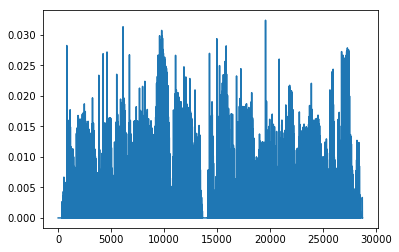

In [10]:
key = trips.keys()[0]
l1=array(map(rad,trips[key][['lat','long']][1:].get_values()))
l2=array(map(rad,trips[key][['lat','long']][:-1].get_values()))
delta = l1-l2
dlat = delta[:,0]
dlon = delta[:,1]
lat = l2[:,0]
lat1 = l1[:,0]
R = 6371 #km
#a = sin(delta[:,0]/2)**2 + cos(l1[:,0])*cos(l2[:,0])*sin(delta[:,1]/2)**2
a = sin(dlat/2)**2 + cos(lat)*cos(lat1)*sin(dlon/2)**2
c = 2*np.arctan2(sqrt(a),sqrt(1-a))
d = R*c
print sum(d)
plot(d)

In [11]:
v = trips[key]['speed'][1:]
fc = FC_gas(v)
FC = d/fc
FC.sum()

103.56215679699683

In [12]:
def FC(trip,FC_func):
    l = trip[['lat','long']].dropna()
    l = rad(l)
    delta = l.diff().shift(-1)
    dlat = delta['lat']
    dlon = delta['long']
    lat = l['lat']
    lat1 = lat.shift(-1)
    R = 6371 #km
    a = sin(dlat/2)**2 + cos(lat)*cos(lat1)*sin(dlon/2)**2
    c = 2*np.arctan2(sqrt(a),sqrt(1-a))
    d = R*c
    v = trip['speed'][1:].dropna()
    
    fc = FC_func(v)
    fc_l = d*fc
    return fc_l.sum()
#%time print FC(trips[0]),FC(trips[1])

2014-10-28_20-13-33.csv 1.79158698016 liter
2014-10-29_19-23-31.csv 2.0984047153 liter
2015-04-13_19-48-38.csv 1.31336785711 liter
2015-04-13_20-11-51.csv 1.2890438716 liter
2015-04-15_18-23-43.csv 1.31481067057 liter
2015-04-15_18-46-11.csv 1.2980710518 liter
2015-04-20_18-12-42.csv 1.29872279083 liter
2015-04-20_18-34-50.csv 1.31997558286 liter
2015-04-21_17-22-56.csv 1.33145377499 liter
2015-05-25_12-54-23.csv 1.31846203794 liter
2015-05-25_13-17-44.csv 1.29367513579 liter
2015-05-26_17-11-46.csv 1.38215453102 liter
2015-05-26_17-37-45.csv 1.31720983332 liter
2015-05-27_13-30-57.csv 1.33956739103 liter
2015-05-27_13-55-57.csv 1.35186145065 liter
2015-05-29_14-57-26.csv 1.35567678735 liter
2015-05-29_15-30-56.csv 1.38468859567 liter
2015-05-30_15-32-19.csv 1.30508192862 liter
2015-05-31_15-27-37.csv 1.30874090821 liter
2015-05-31_15-57-01.csv 1.30250803707 liter
2016-06-26_18-51-18.csv 1.25706632659 liter
2016-06-26_19-13-17.csv 1.25577057109 liter
2016-06-26_19-13-20.csv 1.282208031

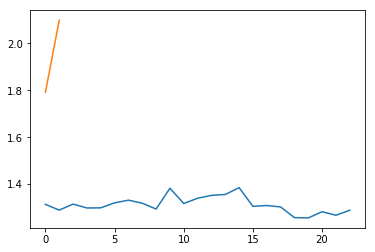

In [29]:
dies = []
gas = []
for trip in trips:
    if trip< '2015-04-13_19-48-38.csv':
        forbrug = FC(trips[trip],FC_gas)
        gas.append(forbrug)
    else:
        if trip in ['2015-05-29_15-21-37.csv',
                    '2016-02-17_09-22-44.csv',
                     '2016-02-17_11-05-34.csv',
                    '2016-06-26_18-51-06.csv',
                    '2015-04-14_19-06-55.csv'
                   ]:
            continue
        forbrug = FC(trips[trip],FC_diesel)
        dies.append(forbrug)
    print trip,forbrug,'liter'
dies = array(dies)
print dies.mean(),dies.max(),dies.min(), (dies.max()-dies.min())/dies.mean(),dies.std()
plot(dies)
plot(gas)


1.31198733361 0.0336230109884 0.0554130822766 0.0428485558384


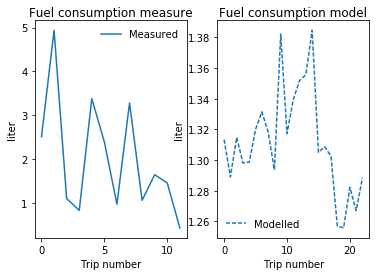

In [40]:
diesel = [
2.51,

4.94,

1.1,

0.83,
3.38,
2.39,
0.97,
3.28,
1.06,

1.645123384,
1.455934195,
0.430082256]
print mean(dies),std(dies),(max(dies)-mean(dies))/mean(dies),(mean(dies)-min(dies))/mean(dies)

subplot(121) 
plot(diesel, label="Measured")
legend()
ylabel('liter')
title('Fuel consumption measure')
xlabel('Trip number')
subplot(122)
ylabel('liter')
title('Fuel consumption model')
plot(dies,label="Modelled",linestyle='dashed')
xlabel('Trip number')
legend()

In [2]:
import sklearn

from sklearn.cluster import KMeans

ImportError: No module named sklearn

In [3]:
data = trips['2015-05-31_15-57-01.csv']
max(data['locationSpeed'])

NameError: name 'trips' is not defined

In [45]:
est = KMeans(n_clusters=5,n_init=10)

In [46]:
est.fit(data.dropna())

ValueError: invalid literal for float(): 10.113.14.96

In [47]:
from scipy.signal import firwin,lfilter
fir_win = firwin(50,2,nyq=45.)
for trip in trips:
    if u'accelerationX' in trips[trip].columns:
        acc = 'acceleration{}'
    else:
        acc = 'accelerometerAcceleration{}'
    s = trips[trip][acc.format('X')]
    b_low = lfilter(fir_win,1,s)
    trips[trip]['accX_lp'] = b_low
    s = trips[trip][acc.format('Y')]
    b_low = lfilter(fir_win,1,s)
    trips[trip]['accY_lp'] = b_low
    s = trips[trip][acc.format('Z')]
    b_low = lfilter(fir_win,1,s)
    trips[trip]['accZ_lp'] = b_low

                    
            

In [48]:
trips['2015-05-26_17-11-46.csv'][['accelerometerAccelerationX','accelerometerAccelerationY','accelerometerAccelerationZ']].dropna()

loggingTime
2016-06-26 19:13:20.678     0.000000
2016-06-26 19:13:21.304     0.000000
2016-06-26 19:13:22.000     0.268743
2016-06-26 19:13:23.041     0.308803
2016-06-26 19:13:24.065     0.484749
2016-06-26 19:13:25.059     0.000000
2016-06-26 19:13:26.052     0.000000
2016-06-26 19:13:27.053     0.000000
2016-06-26 19:13:28.058     0.000000
2016-06-26 19:13:29.098     0.777057
2016-06-26 19:13:30.009     0.799235
2016-06-26 19:13:31.067     0.770854
2016-06-26 19:13:32.124     0.770025
2016-06-26 19:13:33.204     0.779722
2016-06-26 19:13:34.194     0.847691
2016-06-26 19:13:35.143     0.976067
2016-06-26 19:13:36.179     1.193402
2016-06-26 19:13:37.128     1.271626
2016-06-26 19:13:38.133     1.409225
2016-06-26 19:13:39.078     1.526385
2016-06-26 19:13:40.027     1.664916
2016-06-26 19:13:41.056     1.787277
2016-06-26 19:13:42.052     1.876951
2016-06-26 19:13:43.114     1.949565
2016-06-26 19:13:44.111     2.038977
2016-06-26 19:13:45.106     2.214763
2016-06-26 19:13:46.068   

In [300]:
xxx = np.array([[0,10],[1,13],[2,2],[3,1000]])
order = xxx[:,1].argsort()
yyy = xxx[order]
print xxx[:,1].argsort()
print np.where(order==0)[0][0]

[2 0 1 3]
1


2014-10-28_20-13-33.csv
[[    0 16018]
 [    1  1088]
 [    2  3059]
 [    3  2641]
 [    4  4306]
 [    5  1607]]
[4 4 4 ..., 5 5 5]
[1 5 3 2 4 0]
2014-10-29_19-23-31.csv
[[    0  3045]
 [    1  2290]
 [    2 16323]
 [    3   994]
 [    4  6505]
 [    5  5996]]
[0 0 0 ..., 0 0 0]
[3 1 0 5 4 2]
2015-04-15_18-23-43.csv
[[    0 17670]
 [    1  1617]
 [    2  1322]
 [    3  5479]
 [    4  3956]
 [    5  6770]]
[4 4 4 ..., 4 4 4]
[2 1 4 3 5 0]
2015-04-15_18-46-11.csv
[[    0 24205]
 [    1  4703]
 [    2  1984]
 [    3  3447]
 [    4  1184]
 [    5    26]]
[0 0 0 ..., 5 5 5]
[5 4 2 3 1 0]
2015-04-20_18-12-42.csv
[[    0  9180]
 [    1 14920]
 [    2  1607]
 [    3  3237]
 [    4  1381]
 [    5  3703]]
[4 4 4 ..., 5 5 5]
[4 2 3 5 0 1]
2015-04-20_18-34-50.csv
[[    0 23458]
 [    1  3935]
 [    2  1331]
 [    3  5906]
 [    4  2048]
 [    5    26]]
[0 0 0 ..., 5 5 5]
[5 2 4 1 3 0]
2015-04-21_17-22-56.csv
[[    0  4375]
 [    1  4598]
 [    2 17501]
 [    3  7248]
 [    4  2036]
 [    5  1294

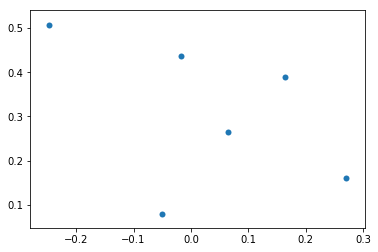

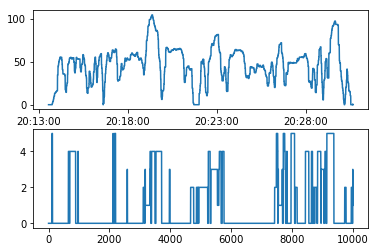

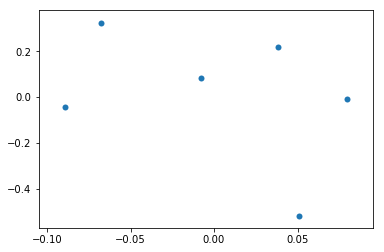

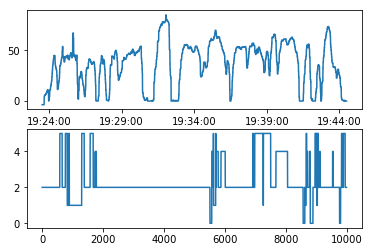

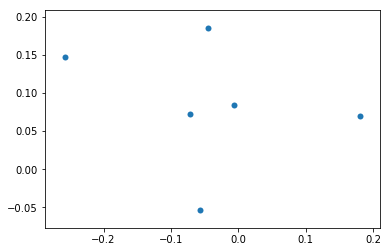

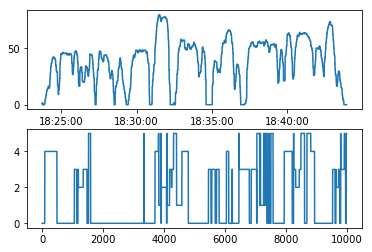

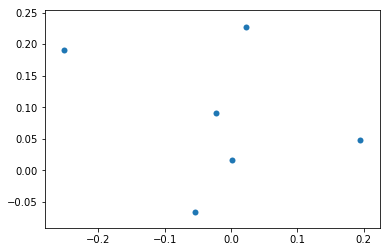

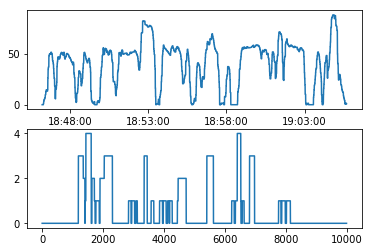

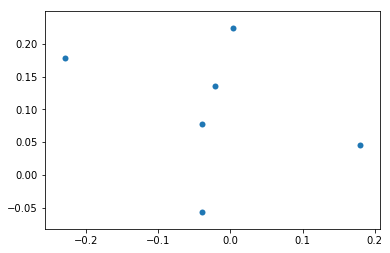

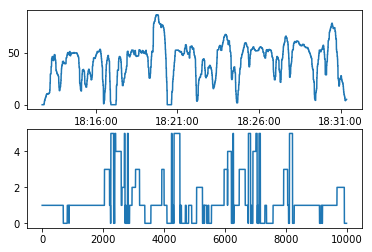

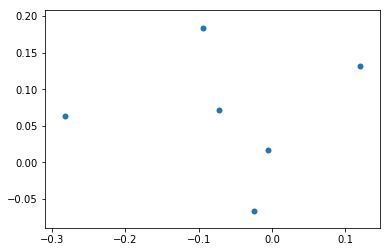

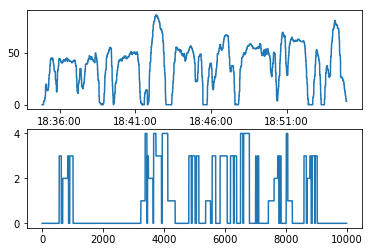

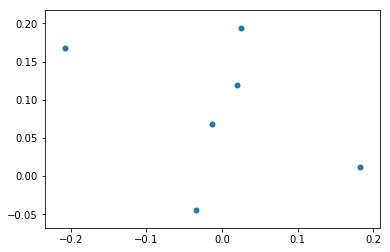

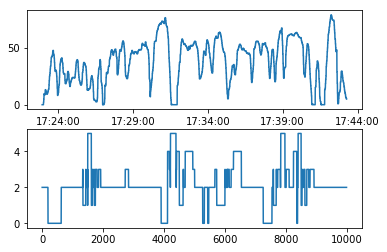

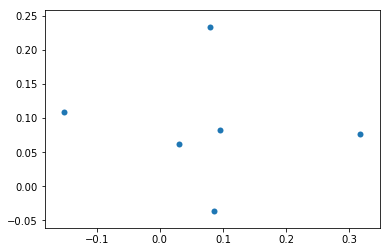

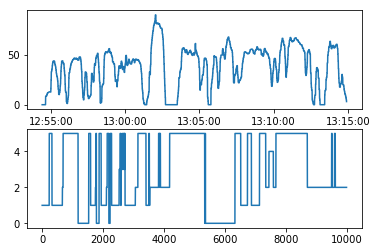

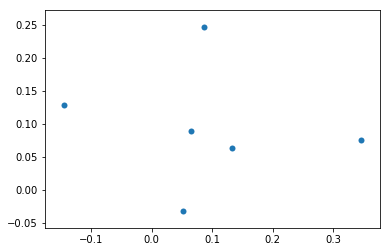

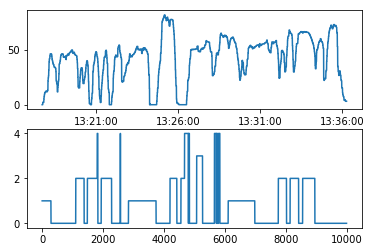

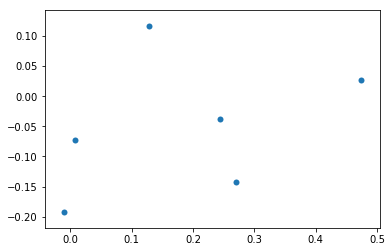

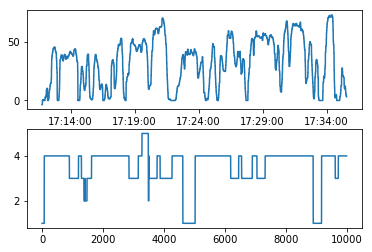

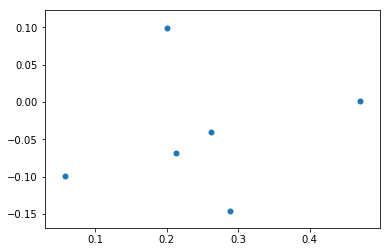

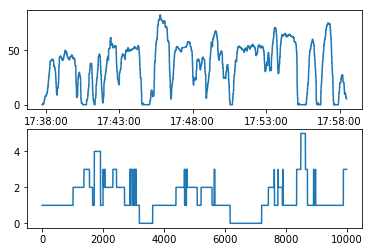

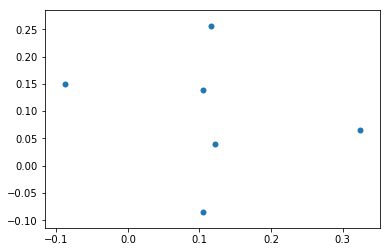

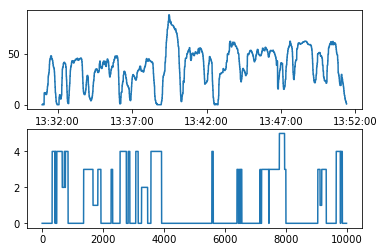

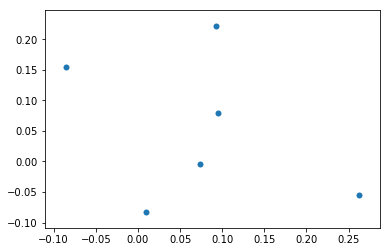

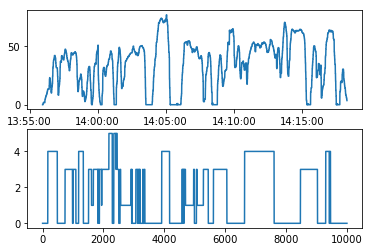

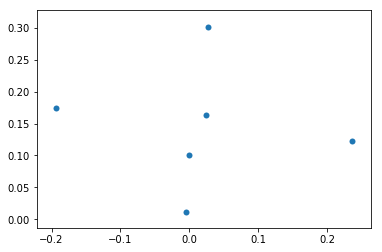

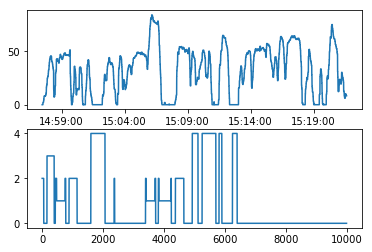

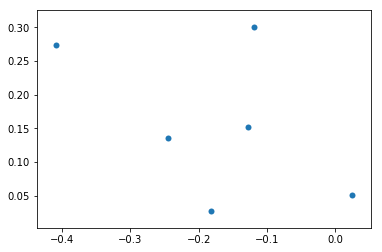

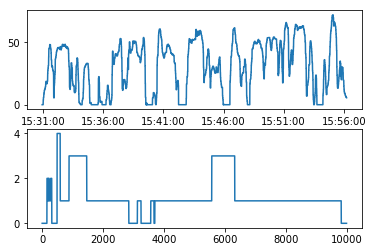

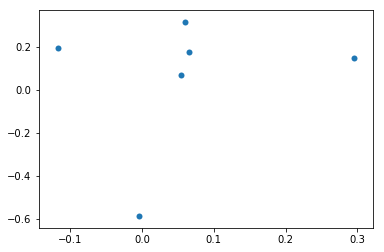

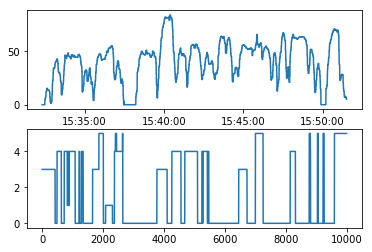

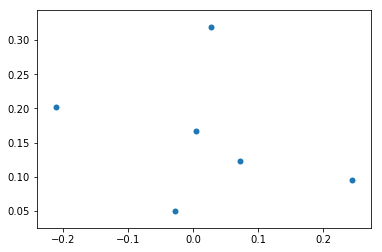

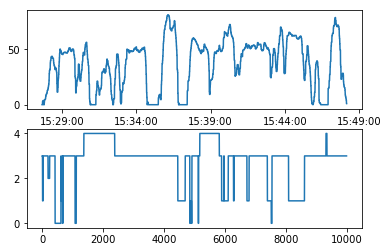

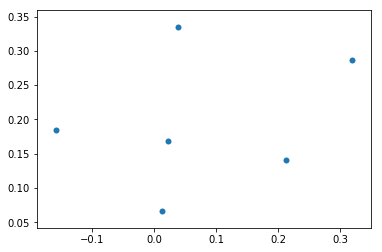

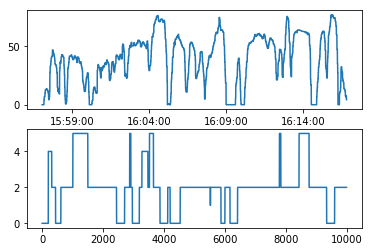

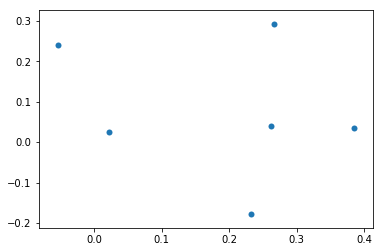

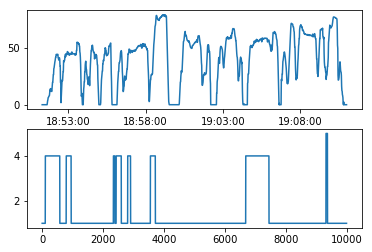

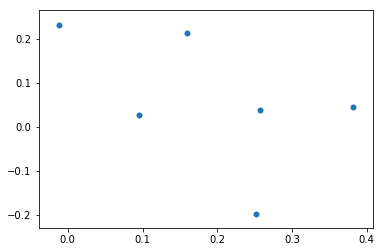

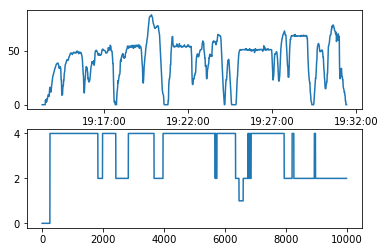

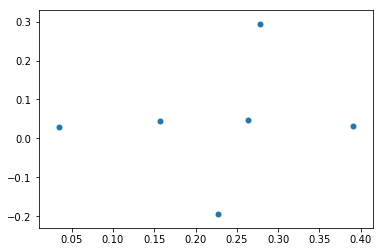

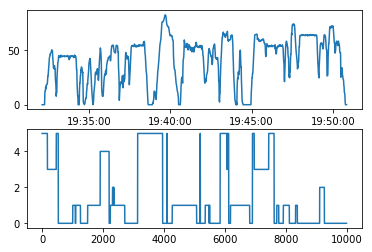

In [304]:
centers = OrderedDict()
clusters = OrderedDict()
for trip in trips:
    print trip
    if trip in ['2015-04-13_19-48-38.csv','2015-04-13_20-11-51.csv','2015-04-14_19-06-55.csv',
               '2015-05-29_15-21-37.csv','2016-02-17_09-21-19.csv','2016-02-17_09-22-44.csv','2016-02-17_11-05-34.csv',
               '2016-06-26_18-51-06.csv','2016-06-26_19-13-20.csv','2016-06-26_19-32-08.csv']:
        continue
    data = trips[trip][['accX_lp','accY_lp','accZ_lp']].dropna() #]]
    d1 = data #[15000:25000]
    est = KMeans(n_clusters=6,n_init=10)
    est.fit(d1)
    clust = est.predict(data)
    cent = est.cluster_centers_
    sizes = []
    for i in range(6):
        sizes.append((i,len(clust[clust==i])))
    sizes = array(sizes)
    print sizes
    order = sizes[:,1].argsort() #Order by cluster size
    sizes = sizes[order]
    centers[trip] = cent[order]
    clust1 = array([ np.where(order==x)[0][0] for x in clust])
    print clust1
    print order
    clusters[trip] = clust1
    scatter(cent[:,0],cent[:,1])
    fig = figure()
    fig.add_subplot(211)
    spd = trips[trip]['speed'].dropna()
    plot(spd*3.6)
    fig.add_subplot(212)
    plot(clust[15000:25000])
    figure()


In [305]:
centers_array = array(centers.values())
clusters_array = array(clusters.values())

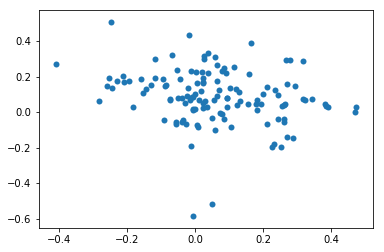

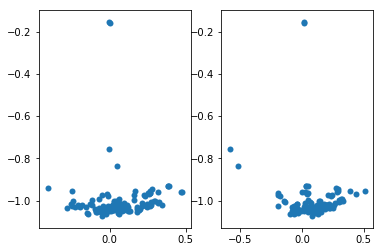

In [306]:

sct=scatter(centers_array[:,:,0].flatten(),centers_array[:,:,1].flatten())
fig=figure()
fig.add_subplot(121)
sct=scatter(centers_array[:,:,0].flatten(),centers_array[:,:,2].flatten())
fig.add_subplot(122)
sct=scatter(centers_array[:,:,1].flatten(),centers_array[:,:,2].flatten())




In [307]:
min_norm = np.argmin(np.linalg.norm(centers_array,axis=2),axis=1)
min_norm.shape

(21,)

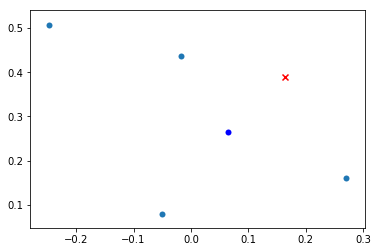

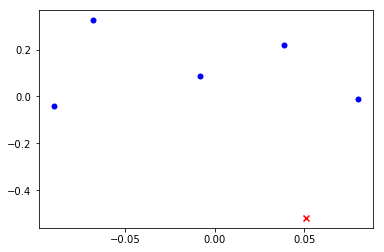

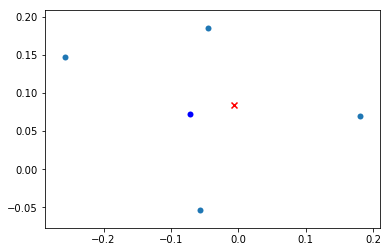

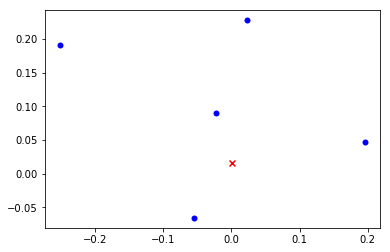

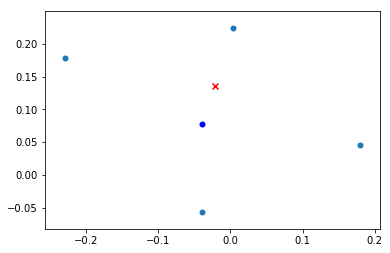

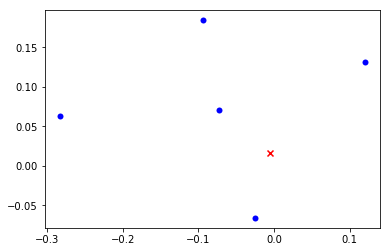

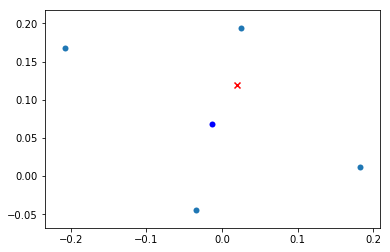

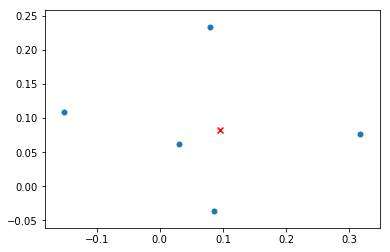

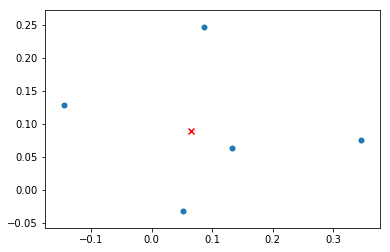

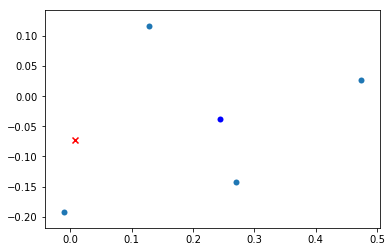

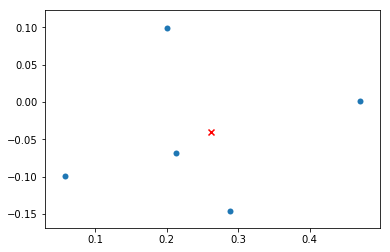

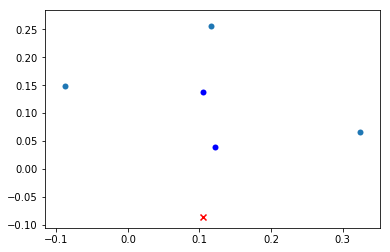

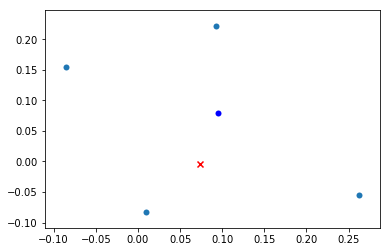

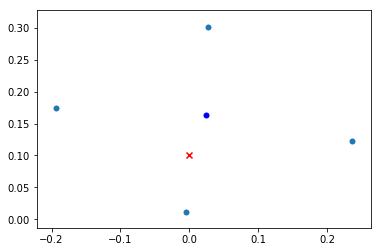

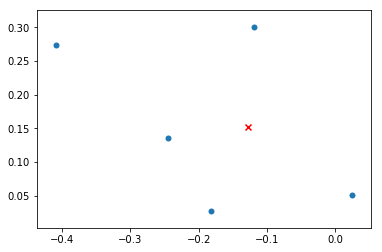

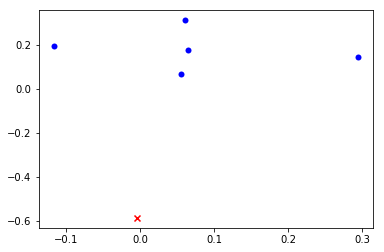

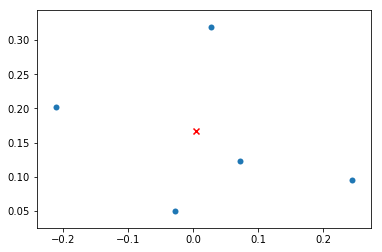

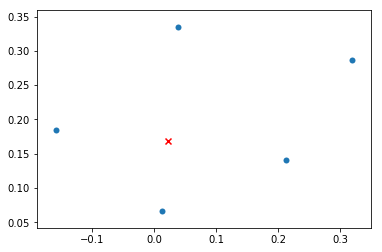

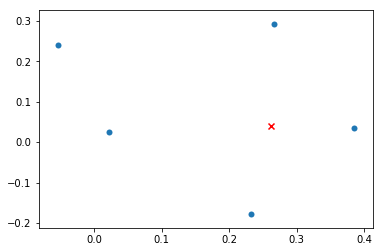

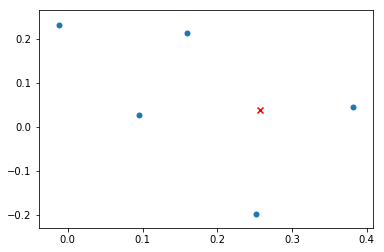

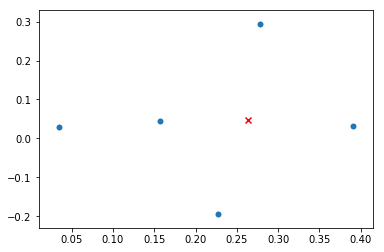

In [308]:

for i in range(centers_array.shape[0]):
    mini = min_norm[i]
    sct = scatter(centers_array[i,:mini,0].flatten(),centers_array[i,:mini,1].flatten(),marker='o')
    sct1 = scatter(centers_array[i,mini,0].flatten(),centers_array[i,mini,1].flatten(),marker='x',c='r')
    if mini < 5:
        sct2 = scatter(centers_array[i,mini+1:,0].flatten(),centers_array[i,mini+1:,1].flatten(),marker='o',c='b')
    figure()


In [309]:
clusters

OrderedDict([('2014-10-28_20-13-33.csv', array([4, 4, 4, ..., 5, 5, 5])),
             ('2014-10-29_19-23-31.csv', array([0, 0, 0, ..., 0, 0, 0])),
             ('2015-04-15_18-23-43.csv', array([4, 4, 4, ..., 4, 4, 4])),
             ('2015-04-15_18-46-11.csv', array([0, 0, 0, ..., 5, 5, 5])),
             ('2015-04-20_18-12-42.csv', array([4, 4, 4, ..., 5, 5, 5])),
             ('2015-04-20_18-34-50.csv', array([0, 0, 0, ..., 5, 5, 5])),
             ('2015-04-21_17-22-56.csv', array([4, 4, 4, ..., 5, 5, 5])),
             ('2015-05-25_12-54-23.csv', array([5, 5, 5, ..., 3, 3, 3])),
             ('2015-05-25_13-17-44.csv', array([5, 5, 5, ..., 5, 5, 5])),
             ('2015-05-26_17-11-46.csv', array([4, 4, 4, ..., 5, 5, 5])),
             ('2015-05-26_17-37-45.csv', array([5, 5, 5, ..., 3, 3, 3])),
             ('2015-05-27_13-30-57.csv', array([3, 3, 3, ..., 4, 4, 4])),
             ('2015-05-27_13-55-57.csv', array([4, 4, 4, ..., 4, 4, 4])),
             ('2015-05-29_14-57-26.csv

In [310]:
trip_key = '2015-04-21_17-22-56.csv'
trip = trips[trip_key]['speed']
clust = clusters[trip_key]
print len(trip),len(clust)
print clust

37052 37052
[4 4 4 ..., 5 5 5]


2014-10-28 & $16018$ & $835$ & $5.2$ & \ \hline
2014-10-29 & $16323$ & $2461$ & $15.1$ & \ \hline
2015-04-15 & $17670$ & $2733$ & $15.5$ & \ \hline
2015-04-15 & $24205$ & $4823$ & $19.9$ & \ \hline
2015-04-20 & $14920$ & $1411$ & $9.5$ & \ \hline
2015-04-20 & $23458$ & $3837$ & $16.4$ & \ \hline
2015-04-21 & $17501$ & $1965$ & $11.2$ & \ \hline
2015-05-25 & $63491$ & $11447$ & $18.0$ & \ \hline
2015-05-25 & $54737$ & $7798$ & $14.2$ & \ \hline
2015-05-26 & $64564$ & $11260$ & $17.4$ & \ \hline
2015-05-26 & $59807$ & $14517$ & $24.3$ & \ \hline
2015-05-27 & $44838$ & $5884$ & $13.1$ & \ \hline
2015-05-27 & $45073$ & $10818$ & $24.0$ & \ \hline
2015-05-29 & $79000$ & $23148$ & $29.3$ & \ \hline
2015-05-29 & $72548$ & $18794$ & $25.9$ & \ \hline
2015-05-30 & $66407$ & $6159$ & $9.3$ & \ \hline
2015-05-31 & $63646$ & $15398$ & $24.2$ & \ \hline
2015-05-31 & $56896$ & $7390$ & $13.0$ & \ \hline
2016-06-26 & $60110$ & $98$ & $0.2$ & \ \hline
2016-06-26 & $51031$ & $51$ & $0.1$ & \ \hline
201

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



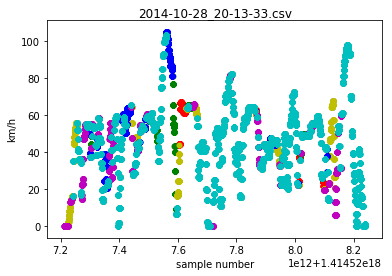

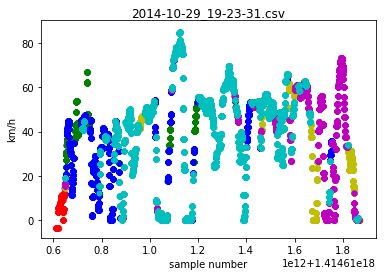

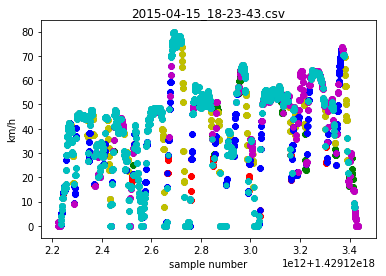

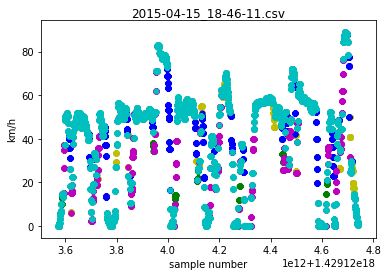

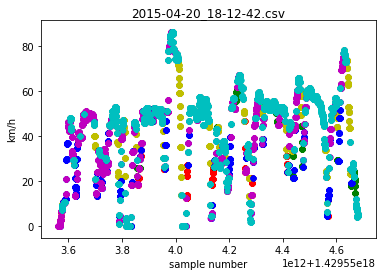

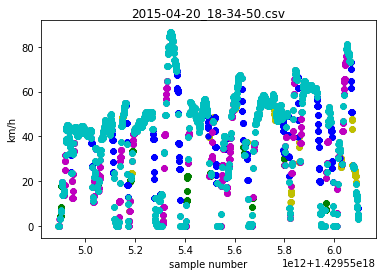

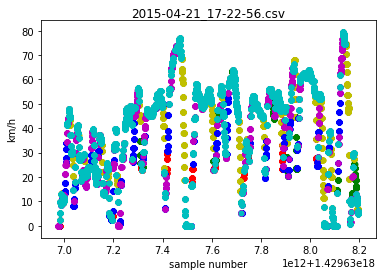

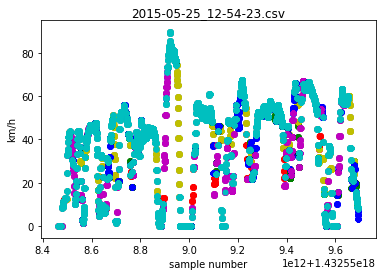

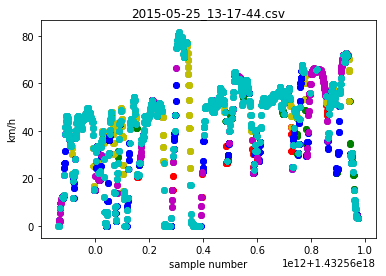

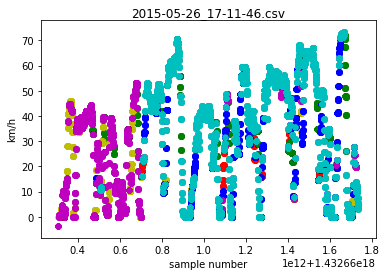

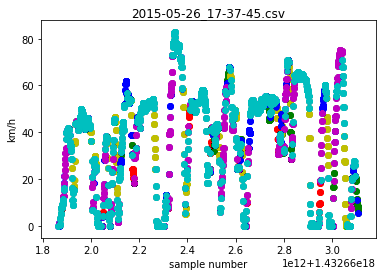

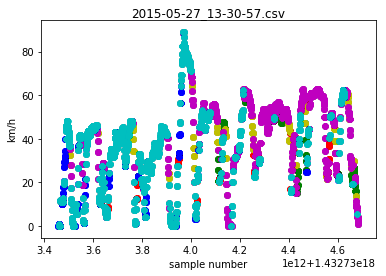

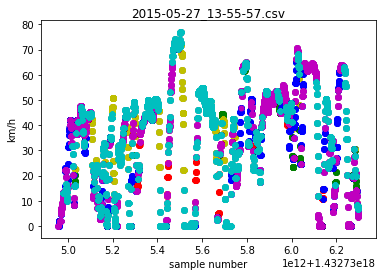

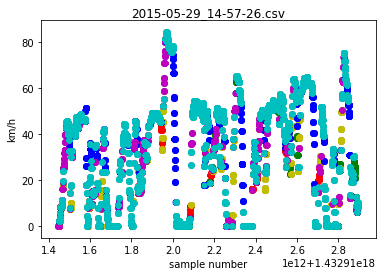

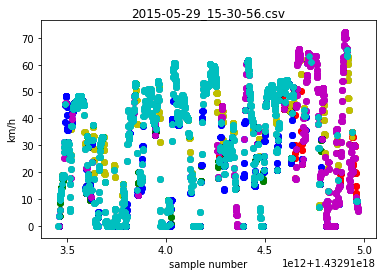

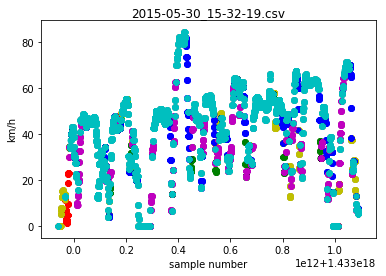

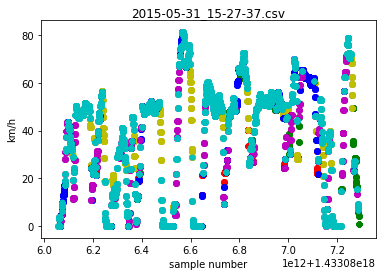

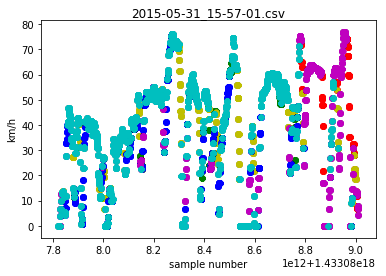

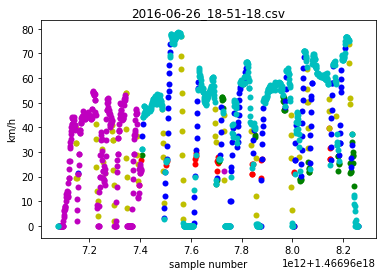

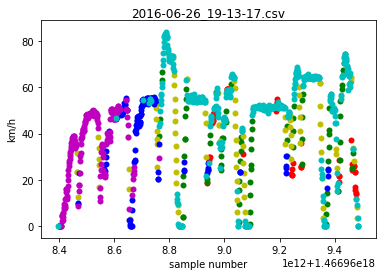

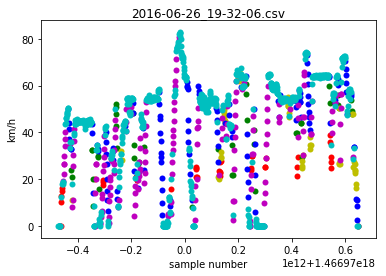

In [327]:
factor = 4
trip_gps = {}
for i,(key,trip) in enumerate(trips.items()):
    if key in ['2016-02-17_09-21-19.csv','2016-02-17_09-22-44.csv']:
        continue
    #trip_len = len(trip)/20
    try:
        clust = clusters[key]#[trip_len:trip_len*factor]
    except KeyError:
        continue
    trip_data = trip['speed']#.iloc[trip_len:trip_len*factor]
    try:
        gps_data = trip[['locationLongitude','locationLatitude']]
    except KeyError:
        gps_data = trip[['long','lat']]
    gps_data['cluster'] = clusters[key]
    trip_gps[key] = gps_data
    title(key)
    ylabel('km/h')
    xlabel('sample number')
    print key.split('_')[0],'&',
    for j in range(6):

        mode = trip_data[clust==j]
        low_speed = mode[mode<10/3.6]
        if j== 5: print ' & '.join(['$%d$'%(len(mode)),'$%d$'%(len(low_speed)),
                                    '$%.1f$'%(100.0*len(low_speed)/len(mode)),'\\ \hline'])
        sct = scatter(mode.index.astype(int64),mode*3.6,c='rgybmc'[j])
    figure()    

In [263]:
sql_string = "insert into trip (date,cluster,route) VALUES\
    ('{date}',{cluster},ST_GeomFromText('POINT({pstring})',4326));"
coords = {'date':'12-9-2016','pstring':'3434 3434,','cluster':0}
print sql_string.format(**coords)

coord = {'latitude': '37.24N', 'longitude': '-115.81W'}
'Coordinates: {latitude}, {longitude}'.format(**coord)

insert into trip (date,cluster,route) VALUES    ('12-9-2016',0,ST_GeomFromText('POINT(3434 3434,)',4326));


'Coordinates: 37.24N, -115.81W'

In [264]:
pos_str = []
sqlcommand = open('sqlcommand','w')
sqlcommand.write('BEGIN;\n')
for key,gps in trip_gps.items():
    if key != '2015-04-21_17-22-56.csv':
        continue
    gps_ = array(gps.dropna())
    for a in gps_:
        #pos_str.append('{} {}'.format(a[0],a[1]))
    
        print >>sqlcommand,sql_string.format(**{'date':key.split('_')[0],
                                                'cluster':a[2],'pstring':'{} {}'.format(a[0],a[1])})

sqlcommand.write('COMMIT;\n')
sqlcommand.close()

2015-04-20_18-34-50.csv
[4 4 4 ..., 0 0 0]
(36704,) (36704,)
(36704,) (36704,)
(36704,) (36704,)
(36704,) (36704,)
(36704,) (36704,)
(36704,) (36704,)


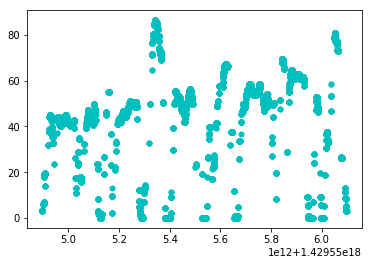

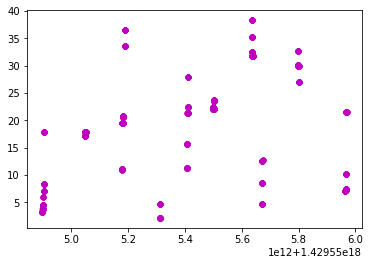

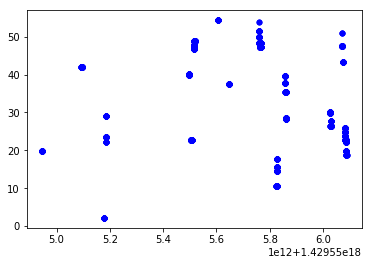

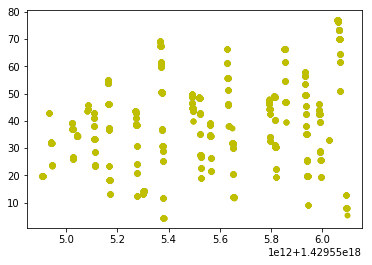

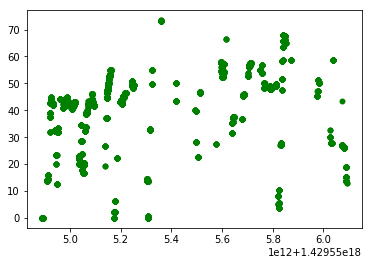

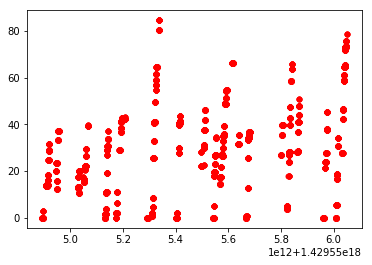

In [265]:
i = 5

key = clusters.items()[i][0]
print key
trip_data = trips[key]['speed'].dropna()
clust = clusters_array[i]
print clust

for j in range(6):
    print trip_data.shape,clust.shape
    mode = trip_data[clust==j]

    sct = scatter(mode.index.astype(int64),mode*3.6,c='cmbygr'[j])
    figure()

False
False
False
False
False
False
False
True
True
False
True
False
False
False
True
False
True
True
True
True
True


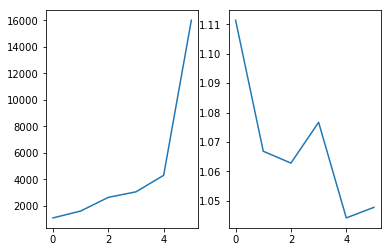

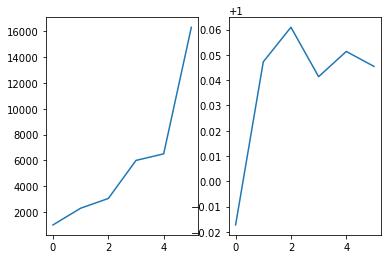

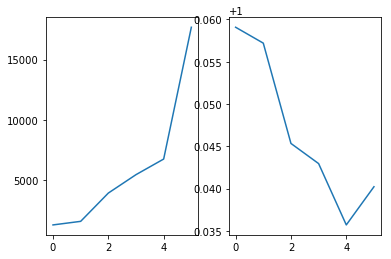

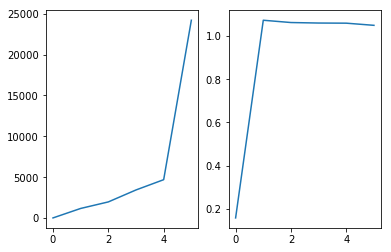

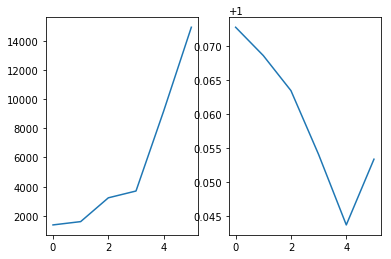

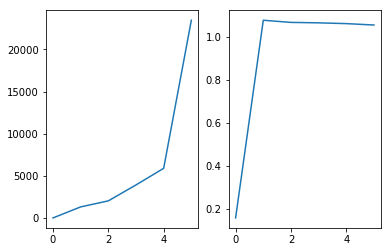

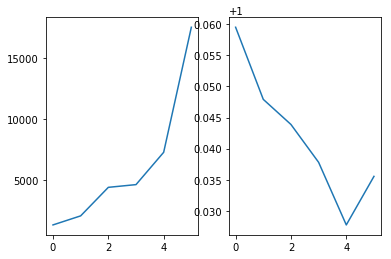

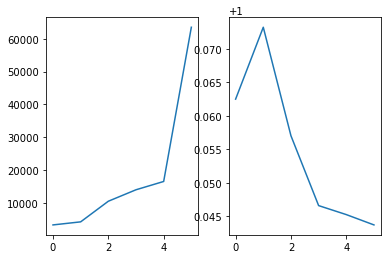

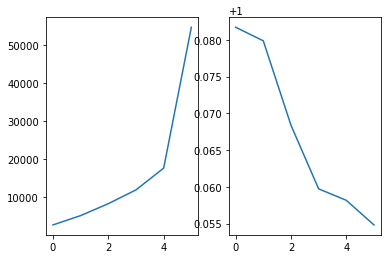

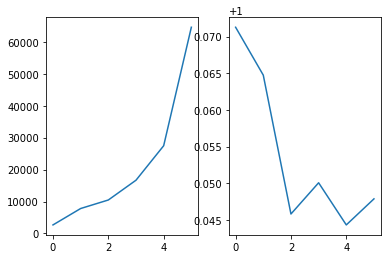

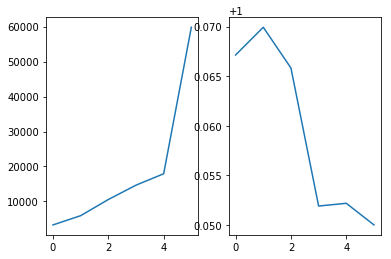

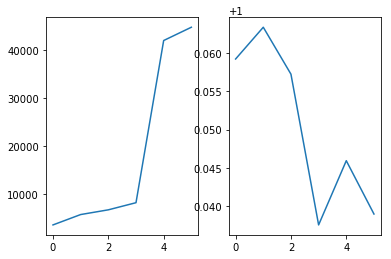

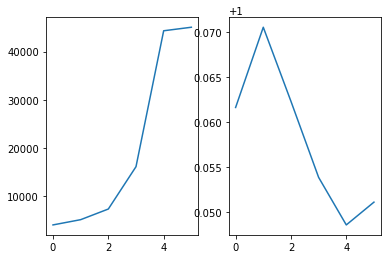

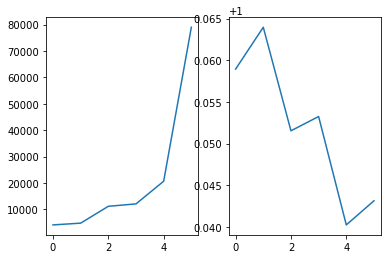

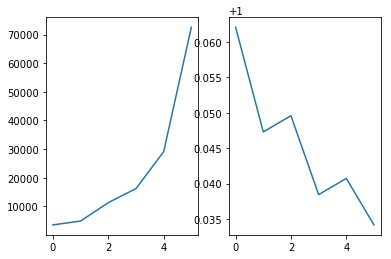

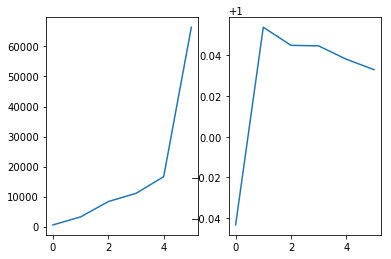

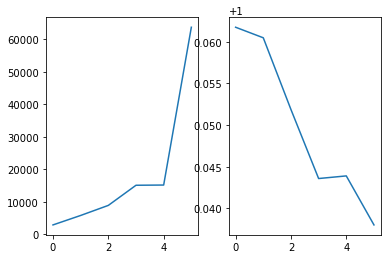

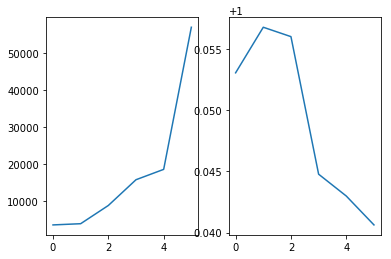

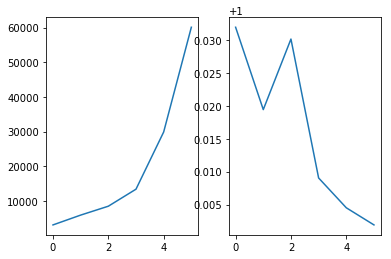

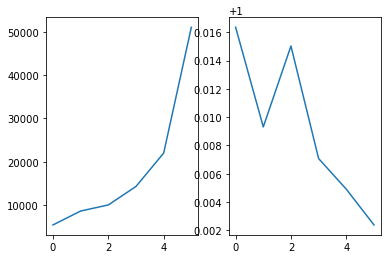

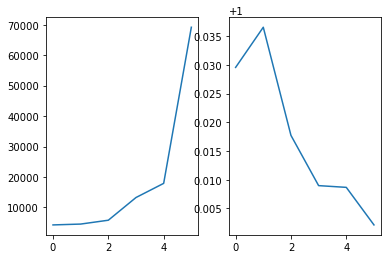

In [312]:
for i,clust in enumerate(clusters_array):
    fig = figure()
    fig.add_subplot(121)
    plot(np.histogram(clust,6)[0])
    fig.add_subplot(122)
    plot(np.linalg.norm(centers_array[i],axis=1))
    print np.argmin(np.linalg.norm(centers_array[i],axis=1))==np.argmax(np.histogram(clust,6)[0])

In [ ]:

trace1 = Scatter3d(x=centers[:,:,0].flatten(),y=centers[:,:,1].flatten(),z=centers[:,:,2].flatten())
data = Data([trace1, ])
layout = Layout(
    margin=Margin(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='simple-3d-scatter')



array([[[ -2.47053204e-01,   5.07892713e-01,  -9.57180563e-01],
        [  2.70013057e-01,   1.61036184e-01,  -1.01944331e+00],
        [ -1.82016729e-02,   4.36847478e-01,  -9.68698467e-01],
        [ -5.02333726e-02,   8.04030845e-02,  -1.07248336e+00],
        [  1.64248121e-01,   3.90308626e-01,  -9.54421072e-01],
        [  6.39276570e-02,   2.63883220e-01,  -1.01195350e+00]],

       [[  5.07464330e-02,  -5.16088784e-01,  -8.34752056e-01],
        [ -6.76202501e-02,   3.24676547e-01,  -9.93328113e-01],
        [ -8.95239971e-02,  -4.16972177e-02,  -1.05630939e+00],
        [  3.83361531e-02,   2.19476969e-01,  -1.01724237e+00],
        [  7.98666946e-02,  -9.50997442e-03,  -1.04825697e+00],
        [ -7.95156794e-03,   8.51668730e-02,  -1.04192097e+00]],

       [[ -2.57944497e-01,   1.46742506e-01,  -1.01664683e+00],
        [  1.81128062e-01,   6.94789912e-02,  -1.03924337e+00],
        [ -5.64776233e-02,  -5.40988778e-02,  -1.04240099e+00],
        [ -4.49731400e-02,   1.85718

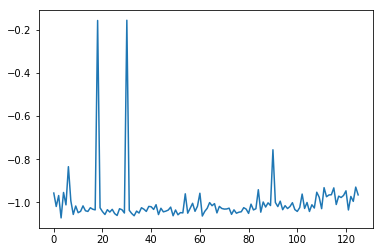

In [313]:
center_norm = np.linalg.norm(centers_array,axis=2)
max_norm = np.argmax(center_norm,axis=1)
plot(centers_array[:,:,2].flatten())
centers_array

In [314]:
for j,clust in enumerate(clusters_array):
    print clusters.keys()[j]
    for i in range(6):
        print clust[clust==i].shape,
        if i == min_norm[j]: print '<====== mini'
        elif i == max_norm[j]: print '<====== max'
        else: print
    print
    print len(clust[clust==5]),len(t)

2014-10-28_20-13-33.csv
(1088,) <====== max
(1607,)
(2641,)
(3059,)
(4306,) <====== mini
(16018,)

2014-10-29_19-23-31.csv
(994,) <====== mini
(2290,)
(3045,) <====== max
(5996,)
(6505,)
(16323,)

2015-04-15_18-23-43.csv
(1322,) <====== max
(1617,)
(3956,)
(5479,)
(6770,) <====== mini
(17670,)

2015-04-15_18-46-11.csv
(26,) <====== mini
(1184,) <====== max
(1984,)
(3447,)
(4703,)
(24205,)

2015-04-20_18-12-42.csv
(1381,) <====== max
(1607,)
(3237,)
(3703,)
(9180,) <====== mini
(14920,)

2015-04-20_18-34-50.csv
(26,) <====== mini
(1331,) <====== max
(2048,)
(3935,)
(5906,)
(23458,)

2015-04-21_17-22-56.csv
(1294,) <====== max
(2036,)
(4375,)
(4598,)
(7248,) <====== mini
(17501,)

2015-05-25_12-54-23.csv
(3234,)
(4167,) <====== max
(10455,)
(13949,)
(16478,)
(63491,) <====== mini

2015-05-25_13-17-44.csv
(2788,) <====== max
(5240,)
(8369,)
(11996,)
(17718,)
(54737,) <====== mini

2015-05-26_17-11-46.csv
(2678,) <====== max
(7815,)
(10481,)
(16674,)
(27469,) <====== mini
(64564,)

2015-05

In [78]:
mini

0

$t_a(x)=t_{a}^{0}\left (1 + \alpha \left (\frac{x}{C_a} \right )^\beta \right )$

$\alpha = 0.2$ 

$\beta = 4$

$FC_h(v) = \frac{a+c*v+e*v^2}{1+b*v+d*v^2}$